In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('ggplot')
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
#investigate data frame
data = pd.read_csv('train.csv')

In [3]:
data.head()

id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4       0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [5]:
testdata = pd.read_csv('test.csv')

In [6]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


In [7]:
df = pd.concat([data,testdata])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 275057 entries, 0 to 110022
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               275057 non-null  int64  
 1   CustomerId       275057 non-null  int64  
 2   Surname          275057 non-null  object 
 3   CreditScore      275057 non-null  int64  
 4   Geography        275057 non-null  object 
 5   Gender           275057 non-null  object 
 6   Age              275057 non-null  float64
 7   Tenure           275057 non-null  int64  
 8   Balance          275057 non-null  float64
 9   NumOfProducts    275057 non-null  int64  
 10  HasCrCard        275057 non-null  float64
 11  IsActiveMember   275057 non-null  float64
 12  EstimatedSalary  275057 non-null  float64
 13  Exited           165034 non-null  float64
dtypes: float64(6), int64(5), object(3)
memory usage: 31.5+ MB


In [9]:
df.isnull().sum()

id                      0
CustomerId              0
Surname                 0
CreditScore             0
Geography               0
Gender                  0
Age                     0
Tenure                  0
Balance                 0
NumOfProducts           0
HasCrCard               0
IsActiveMember          0
EstimatedSalary         0
Exited             110023
dtype: int64

In [10]:
df.Exited.value_counts()

Exited
0.0    130113
1.0     34921
Name: count, dtype: int64

In [11]:
df.Geography.value_counts()

Geography
France     157386
Spain       60126
Germany     57545
Name: count, dtype: int64

In [12]:
df.fillna(-1).groupby(df['Geography'], dropna=True)['Exited'].value_counts()

Geography  Exited
France      0.0      78643
           -1.0      63171
            1.0      15572
Germany    -1.0      22939
            0.0      21492
            1.0      13114
Spain       0.0      29978
           -1.0      23913
            1.0       6235
Name: count, dtype: int64

In [13]:
# Recordkeeping is inaccurate with 40% of customer files not showing if they are exited. 
# This is also when investigated across the geographical areas:
# France = 40%
# Germany = 39.9%
# Spain = 39.7%

In [14]:
# I would assume that the records on exited customes is correct and the NaN are cutomers that are still active. 
# Because we do not have the confirmation of record keeping we will need to drop all customer information with out records for being an exited client.
# This should be reviewed

In [15]:
cln = df.dropna()

In [16]:
cln.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [17]:
cln.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  float64
dtypes: float64(6), int64(5), object(3)
memory usage: 18.9+ MB


In [18]:
cln.select_dtypes(include="object").nunique()

Surname      2797
Geography       3
Gender          2
dtype: int64

In [19]:
cln.drop(columns=['id', 'CustomerId', 'Surname'], inplace=True)

C:\Users\p_ste\AppData\Local\Temp\ipykernel_26768\3056184085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln.drop(columns=['id', 'CustomerId', 'Surname'], inplace=True)


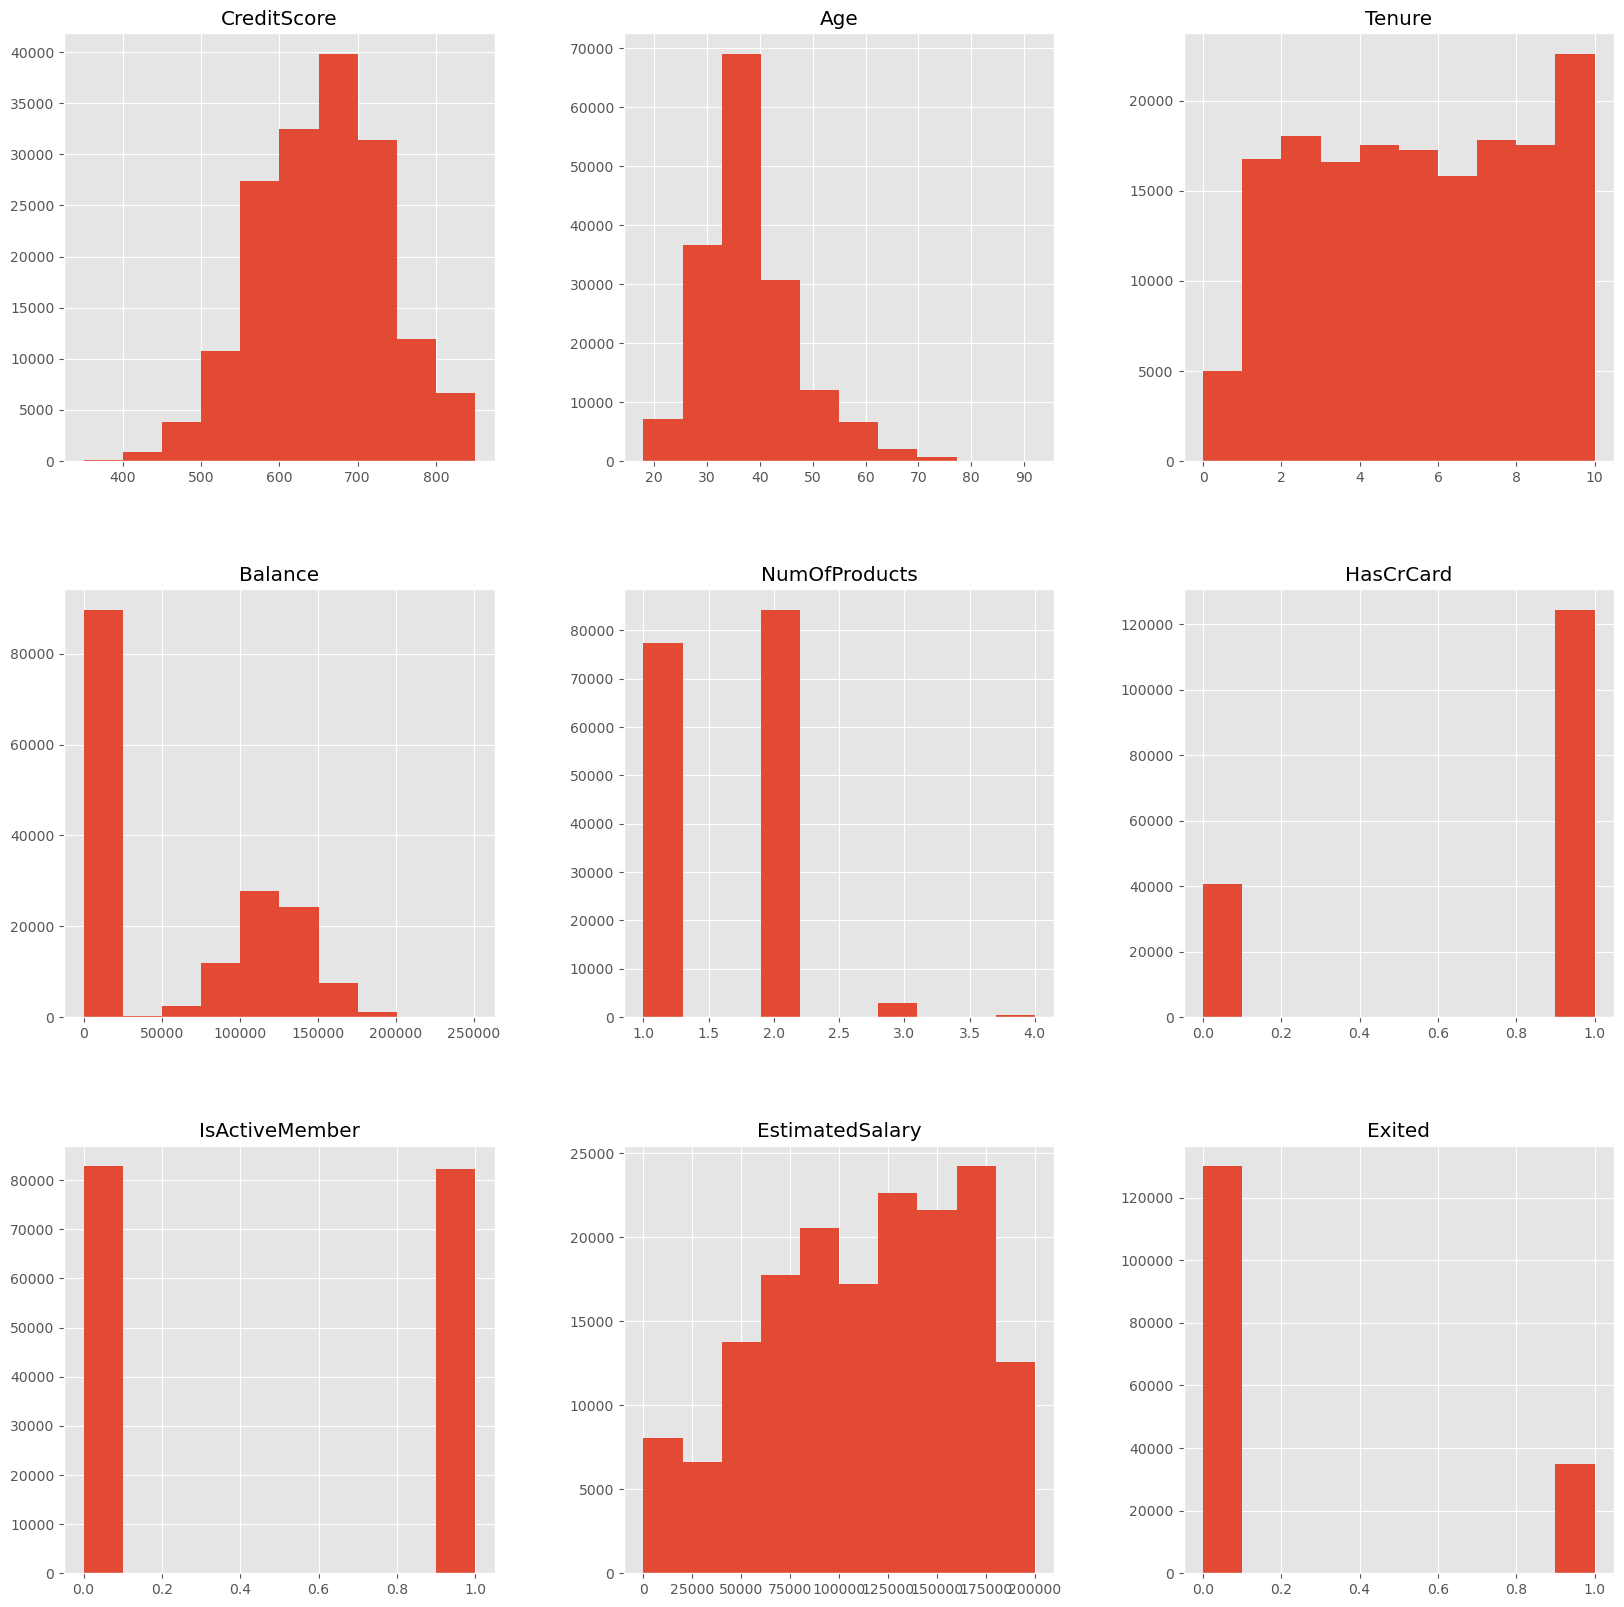

In [20]:
cln.hist(figsize=(20,20));

In [21]:
# likely categorical variables are Tenure, NumOfProducts, HasCrCard and IsActiveMember with Exited being the feature we are trying to predict


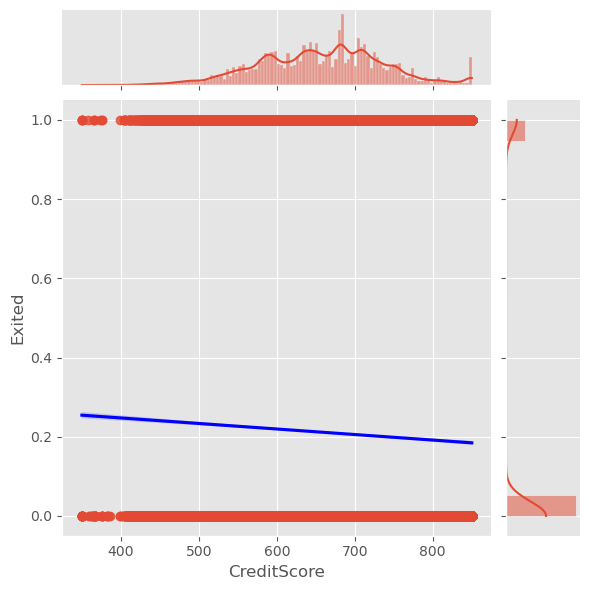

In [22]:
sns.jointplot(data = cln, x= 'CreditScore', y ='Exited', kind='reg', joint_kws={'line_kws':{'color':'blue'}})

In [23]:
# CreditScore has a semi normal distribution but has some outliers

C:\Users\p_ste\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


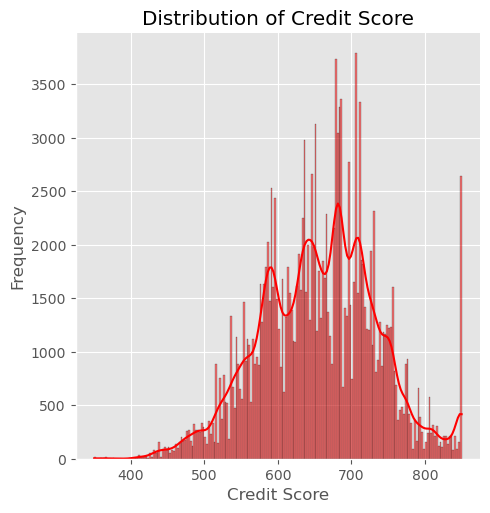

In [24]:
sns.displot(cln['CreditScore'], bins=200, color='red', edgecolor='black', kde=True)

plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Score')
 
plt.show()

In [25]:
cln['CreditScore'].describe()

count    165034.000000
mean        656.454373
std          80.103340
min         350.000000
25%         597.000000
50%         659.000000
75%         710.000000
max         850.000000
Name: CreditScore, dtype: float64

<Axes: >

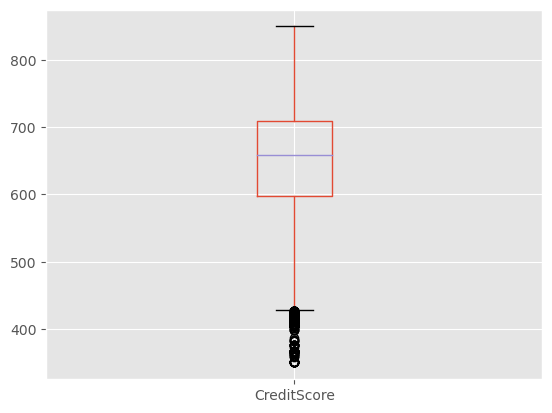

In [26]:
cln.boxplot(column=['CreditScore'])

<Axes: xlabel='CreditScore'>

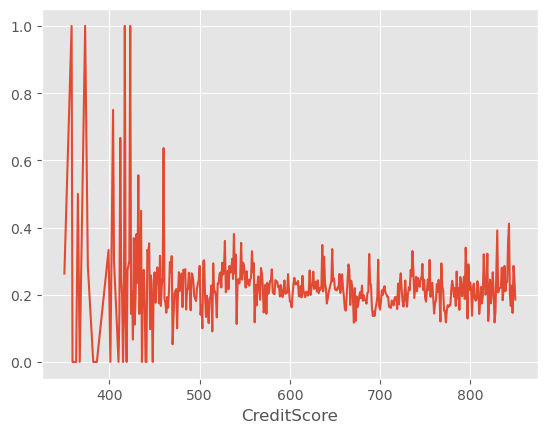

In [27]:
cln.groupby(['CreditScore'])['Exited'].mean().plot()

In [28]:
# after invetigating the credit score, this feature has a maximum of 850 and a minimum of 350. 
# given that most credit scores work with this range as a system, https://www.investopedia.com/articles/personal-finance/080615/highest-credit-score-it-possible-get-it.asp
# we will create a categorical range variable with the following:
# Perfect = 850 = 10 ranging down to 0 = 350 = Minimum Score

In [29]:
def conditions(x):
    if   x >= 850:   return 11
    elif x > 800:   return 10
    elif x > 750:   return 9
    elif x > 700:   return 8
    elif x > 650:   return 7
    elif x > 600:   return 6
    elif x > 550:   return 5
    elif x > 500:   return 4
    elif x > 450:   return 3
    elif x > 400:   return 2
    elif x > 350:   return 1
    else:           return 0

func         = np.vectorize(conditions)
credit_class = func(cln["CreditScore"])

In [30]:
cln["credit_classs"] = credit_class

C:\Users\p_ste\AppData\Local\Temp\ipykernel_26768\2063896468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln["credit_classs"] = credit_class


<Axes: xlabel='credit_classs'>

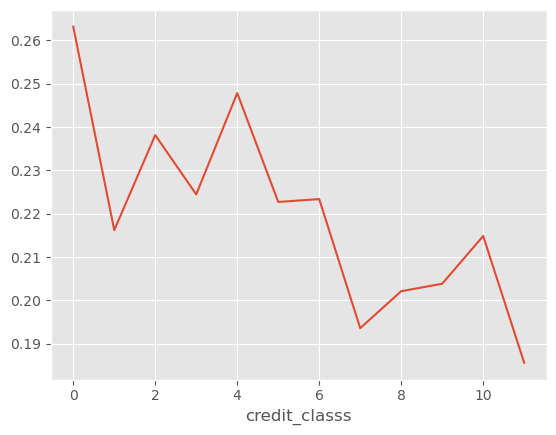

In [31]:
cln.groupby(['credit_classs'])['Exited'].mean().plot()

In [32]:
cln.head()

CreditScore Geography Gender   Age  Tenure    Balance  NumOfProducts  \
0          668    France   Male  33.0       3       0.00              2   
1          627    France   Male  33.0       1       0.00              2   
2          678    France   Male  40.0      10       0.00              2   
3          581    France   Male  34.0       2  148882.54              1   
4          716     Spain   Male  33.0       5       0.00              2   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  credit_classs  
0        1.0             0.0        181449.97     0.0              7  
1        1.0             1.0         49503.50     0.0              6  
2        1.0             0.0        184866.69     0.0              7  
3        1.0             1.0         84560.88     0.0              5  
4        1.0             1.0         15068.83     0.0              8

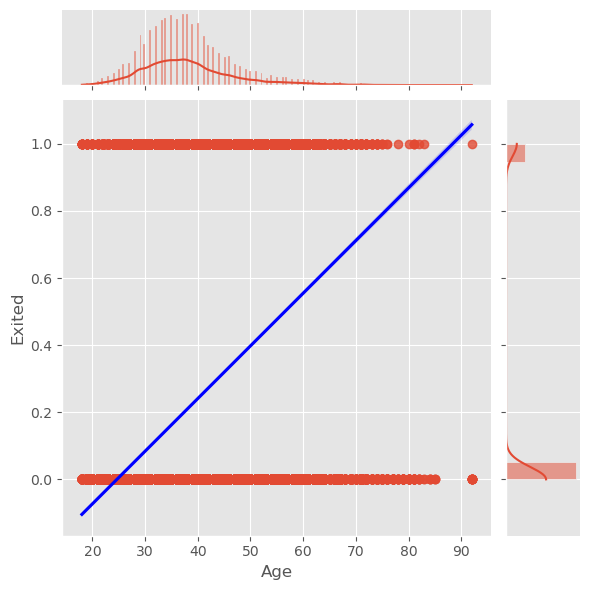

In [33]:
sns.jointplot(data = cln, x= 'Age', y ='Exited', kind='reg', joint_kws={'line_kws':{'color':'blue'}})

<Axes: xlabel='Age'>

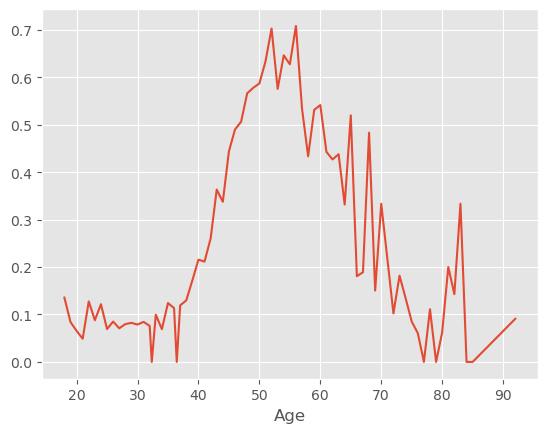

In [34]:
cln.groupby(['Age'])['Exited'].mean().plot()

In [35]:
# Age has a mostly normal ditribution with some slight skewing to the left.
# Improvement will be found with normalisation

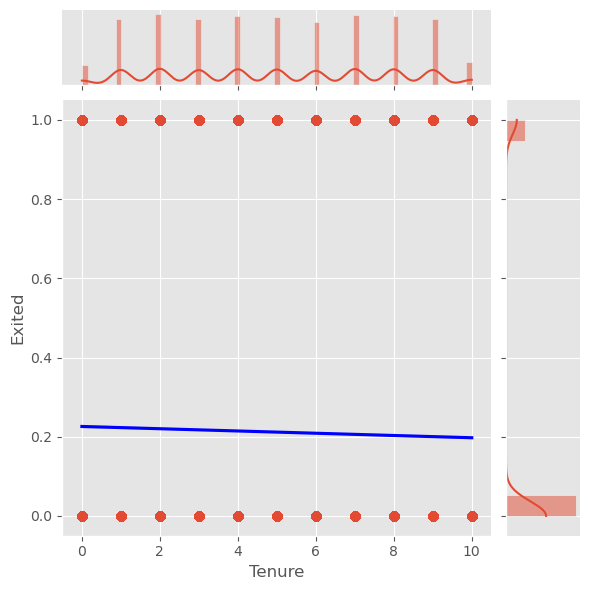

In [36]:
sns.jointplot(data = cln, x= 'Tenure', y ='Exited', kind='reg', joint_kws={'line_kws':{'color':'blue'}})

C:\Users\p_ste\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


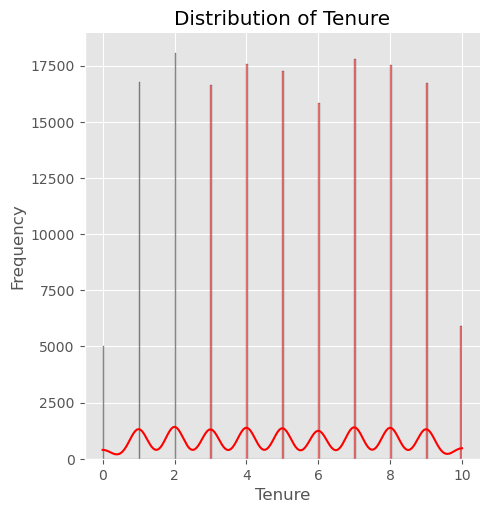

In [37]:
sns.displot(cln['Tenure'], bins=200, color='red', edgecolor='black', kde=True)

plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure')
 
plt.show()

In [38]:
cln['Tenure'].describe()

count    165034.000000
mean          5.020353
std           2.806159
min           0.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          10.000000
Name: Tenure, dtype: float64

<Axes: >

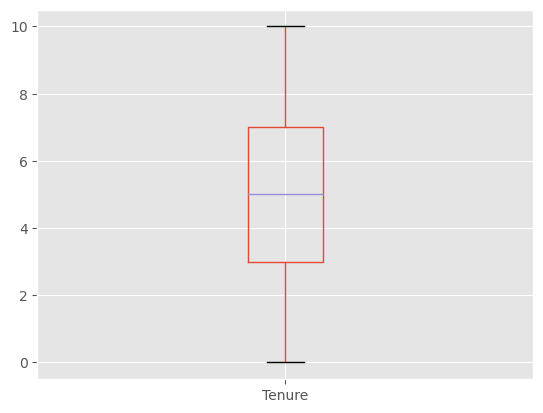

In [39]:
cln.boxplot(column=['Tenure'])

C:\Users\p_ste\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


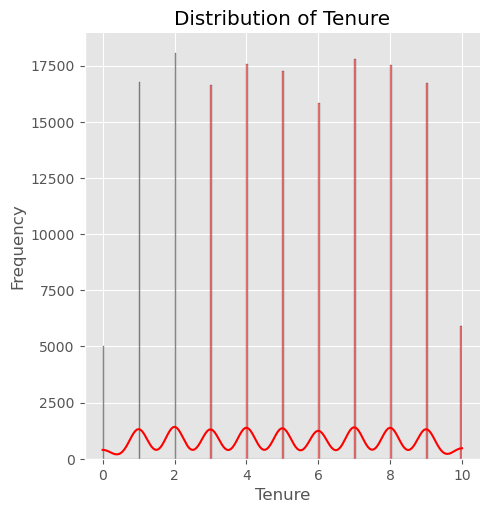

In [40]:
sns.displot(cln['Tenure'], bins=200, color='red', edgecolor='black', kde=True)

plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure')
 
plt.show()

<Axes: xlabel='Tenure'>

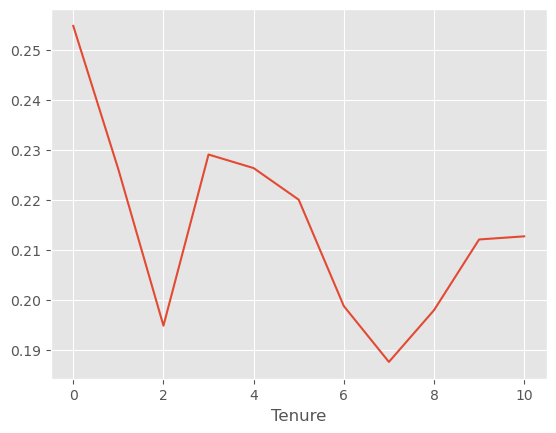

In [41]:
cln.groupby(['Tenure'])['Exited'].mean().plot()

In [42]:
# Unsure of the tenure definition but will use this as a categoricale variable. It shows no outliers

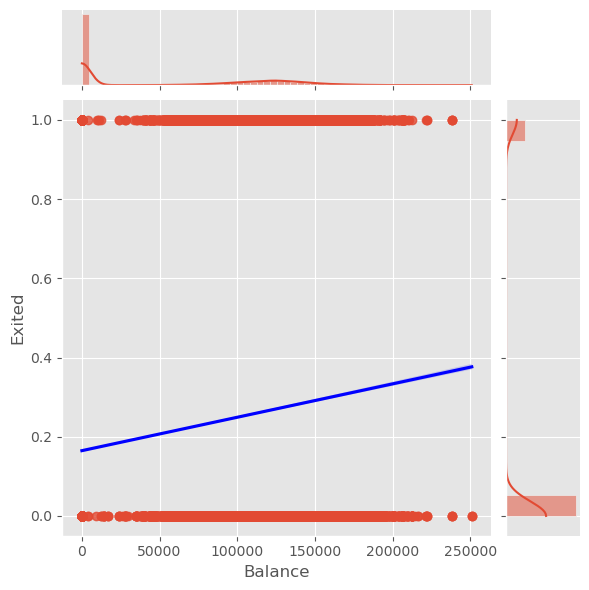

In [43]:
sns.jointplot(data = cln, x= 'Balance', y ='Exited', kind='reg', joint_kws={'line_kws':{'color':'blue'}})

C:\Users\p_ste\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


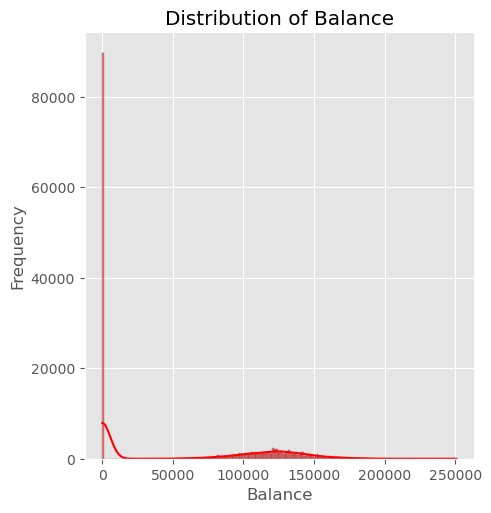

In [44]:
sns.displot(cln['Balance'], bins=200, color='red', edgecolor='black', kde=True)

plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Distribution of Balance')
 
plt.show()

In [45]:
cln['Balance'].describe()

count    165034.000000
mean      55478.086689
std       62817.663278
min           0.000000
25%           0.000000
50%           0.000000
75%      119939.517500
max      250898.090000
Name: Balance, dtype: float64

In [46]:
cln.Balance.value_counts()

Balance
0.00         89648
124577.33       88
127864.40       64
122314.50       63
129855.32       59
             ...  
125824.21        1
158741.56        1
126815.52        1
61172.57         1
110993.29        1
Name: count, Length: 30075, dtype: int64

<Axes: xlabel='Balance'>

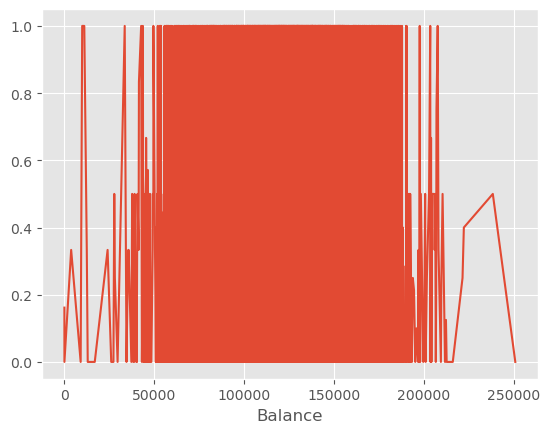

In [47]:
cln.groupby(['Balance'])['Exited'].mean().plot()

In [48]:
# create has balance feature to investigate significance of no balance as a categorical feature
cln['HasBalance']= np.where(cln['Balance']==0,0,1)

C:\Users\p_ste\AppData\Local\Temp\ipykernel_26768\4037153038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln['HasBalance']= np.where(cln['Balance']==0,0,1)


In [49]:
# change balance feature to not include 0 for future calculations
cln['Balance'] = cln['Balance']+1

C:\Users\p_ste\AppData\Local\Temp\ipykernel_26768\3626302550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln['Balance'] = cln['Balance']+1


<Axes: xlabel='HasBalance'>

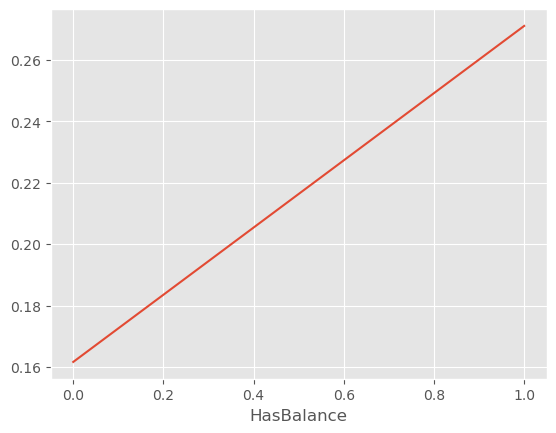

In [50]:
cln.groupby(['HasBalance'])['Exited'].mean().plot()

In [51]:
cln.head()

CreditScore Geography Gender   Age  Tenure    Balance  NumOfProducts  \
0          668    France   Male  33.0       3       1.00              2   
1          627    France   Male  33.0       1       1.00              2   
2          678    France   Male  40.0      10       1.00              2   
3          581    France   Male  34.0       2  148883.54              1   
4          716     Spain   Male  33.0       5       1.00              2   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  credit_classs  \
0        1.0             0.0        181449.97     0.0              7   
1        1.0             1.0         49503.50     0.0              6   
2        1.0             0.0        184866.69     0.0              7   
3        1.0             1.0         84560.88     0.0              5   
4        1.0             1.0         15068.83     0.0              8   

   HasBalance  
0           0  
1           0  
2           0  
3           1  
4           0

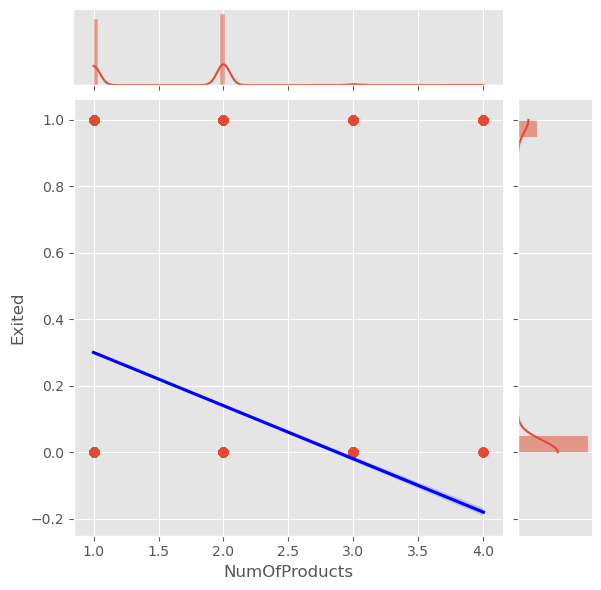

In [52]:
sns.jointplot(data = cln, x= 'NumOfProducts', y ='Exited', kind='reg', joint_kws={'line_kws':{'color':'blue'}})

C:\Users\p_ste\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


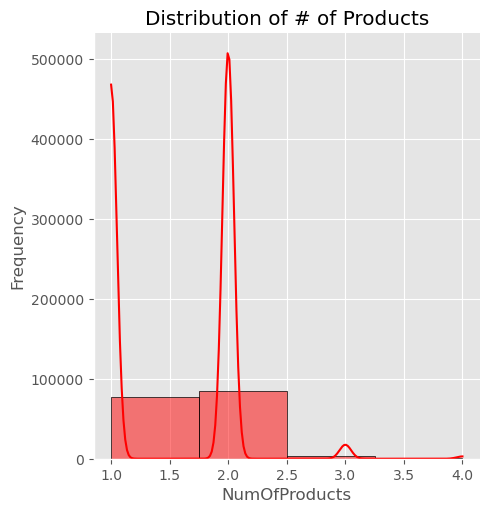

In [53]:
sns.displot(cln['NumOfProducts'], bins=4, color='red', edgecolor='black', kde=True)

plt.xlabel('NumOfProducts')
plt.ylabel('Frequency')
plt.title('Distribution of # of Products')
 
plt.show()

In [54]:
cln['NumOfProducts'].describe()

count    165034.000000
mean          1.554455
std           0.547154
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           4.000000
Name: NumOfProducts, dtype: float64

In [55]:
cln.NumOfProducts.value_counts()

NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64

<Axes: xlabel='NumOfProducts'>

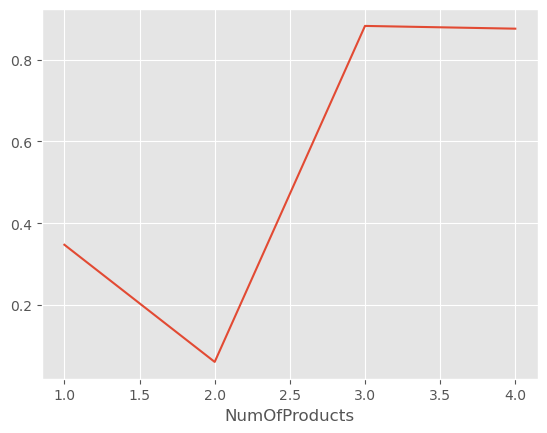

In [56]:
cln.groupby(['NumOfProducts'])['Exited'].mean().plot()

In [57]:
# Use as a categorical variable 

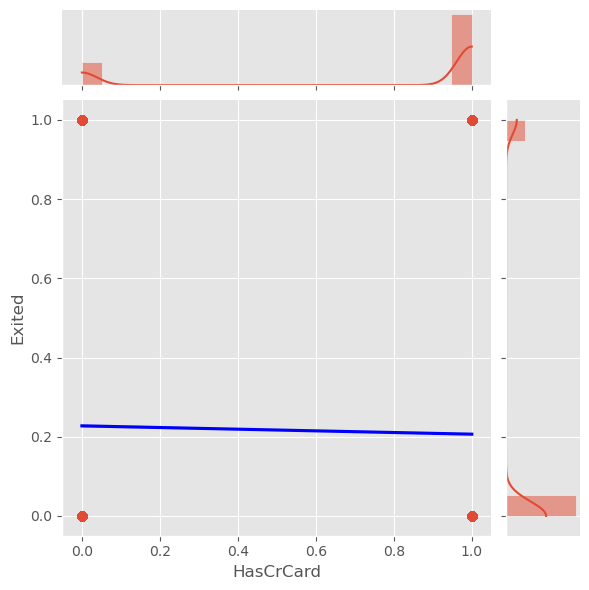

In [58]:
sns.jointplot(data = cln, x= 'HasCrCard', y ='Exited', kind='reg', joint_kws={'line_kws':{'color':'blue'}})

C:\Users\p_ste\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


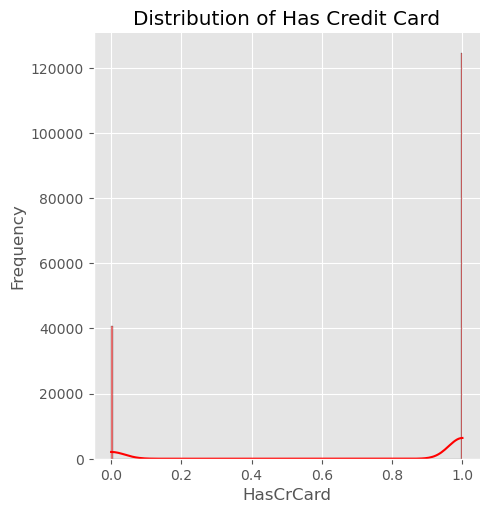

In [59]:
sns.displot(cln['HasCrCard'], bins=200, color='red', edgecolor='black', kde=True)

plt.xlabel('HasCrCard')
plt.ylabel('Frequency')
plt.title('Distribution of Has Credit Card')
 
plt.show()

In [60]:
cln['HasCrCard'].describe()

count    165034.000000
mean          0.753954
std           0.430707
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: HasCrCard, dtype: float64

In [61]:
cln.HasCrCard.value_counts()

HasCrCard
1.0    124428
0.0     40606
Name: count, dtype: int64

In [62]:
cln.groupby(cln['HasCrCard'])['HasBalance'].value_counts()

HasCrCard  HasBalance
0.0        0             21303
           1             19303
1.0        0             68345
           1             56083
Name: count, dtype: int64

In [63]:
cln.groupby(cln['HasCrCard'])['IsActiveMember'].value_counts()

HasCrCard  IsActiveMember
0.0        1.0               20960
           0.0               19646
1.0        0.0               63239
           1.0               61189
Name: count, dtype: int64

<Axes: xlabel='HasCrCard'>

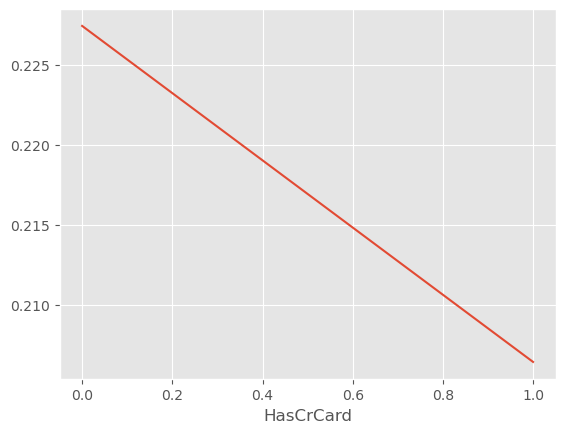

In [64]:
cln.groupby(['HasCrCard'])['Exited'].mean().plot()

In [65]:
# Use as a categoricle variable

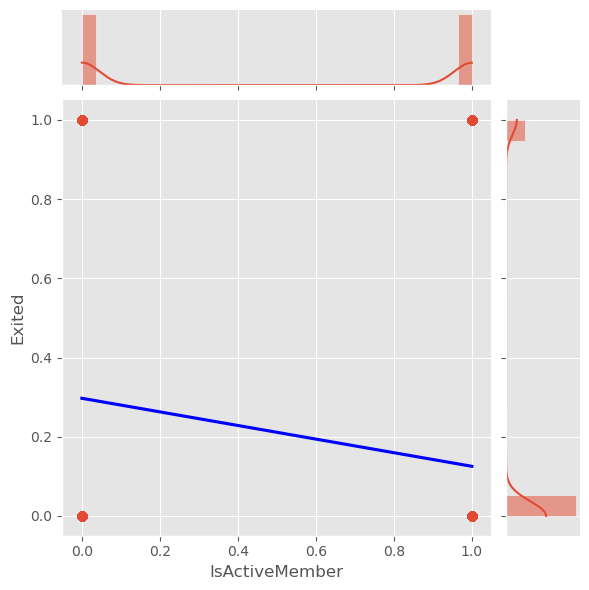

In [66]:
sns.jointplot(data = cln, x= 'IsActiveMember', y ='Exited', kind='reg', joint_kws={'line_kws':{'color':'blue'}})

C:\Users\p_ste\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


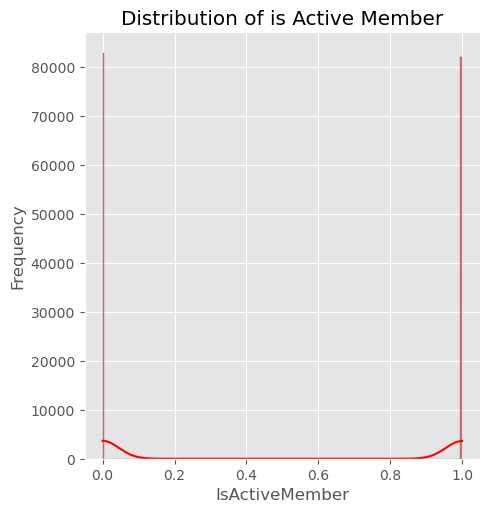

In [67]:
sns.displot(cln['IsActiveMember'], bins=200, color='red', edgecolor='black', kde=True)

plt.xlabel('IsActiveMember')
plt.ylabel('Frequency')
plt.title('Distribution of is Active Member')
 
plt.show()

In [68]:
cln['IsActiveMember'].describe()

count    165034.000000
mean          0.497770
std           0.499997
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: IsActiveMember, dtype: float64

In [69]:
cln.IsActiveMember.value_counts()

IsActiveMember
0.0    82885
1.0    82149
Name: count, dtype: int64

<Axes: xlabel='IsActiveMember'>

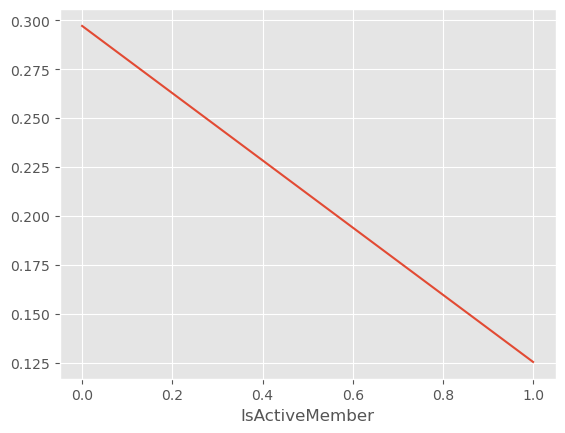

In [70]:
cln.groupby(['IsActiveMember'])['Exited'].mean().plot()

In [71]:
# how is this defined and tracked?

In [72]:
cln.groupby(cln['IsActiveMember'])['HasBalance'].value_counts()

IsActiveMember  HasBalance
0.0             0             44396
                1             38489
1.0             0             45252
                1             36897
Name: count, dtype: int64

In [73]:
cln.groupby(cln['IsActiveMember'])['HasCrCard'].value_counts()

IsActiveMember  HasCrCard
0.0             1.0          63239
                0.0          19646
1.0             1.0          61189
                0.0          20960
Name: count, dtype: int64

In [74]:
# There is a lot of activity that would suggest this is an untrustworthy feature. 
# how is an inactive member holding a credit card and has a balance?
# this needs more clarity and as it stands is not valuable but will see the first model before dropping

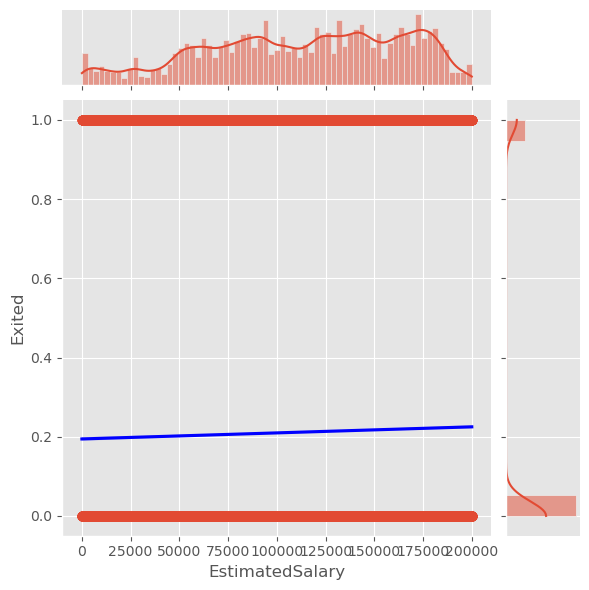

In [75]:
sns.jointplot(data = cln, x= 'EstimatedSalary', y ='Exited', kind='reg', joint_kws={'line_kws':{'color':'blue'}})

C:\Users\p_ste\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


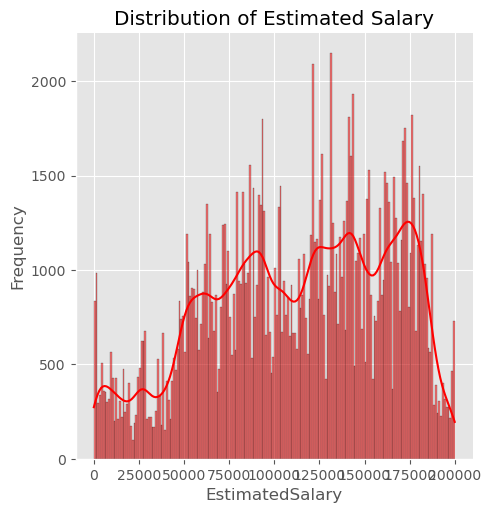

In [76]:
sns.displot(cln['EstimatedSalary'], bins=200, color='red', edgecolor='black', kde=True)

plt.xlabel('EstimatedSalary')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated Salary')
 
plt.show()

In [77]:
# somewhat normal distribution with skewing to the right. Normalisation will help

In [78]:
cln['EstimatedSalary'].describe()

count    165034.000000
mean     112574.822734
std       50292.865585
min          11.580000
25%       74637.570000
50%      117948.000000
75%      155152.467500
max      199992.480000
Name: EstimatedSalary, dtype: float64

<Axes: >

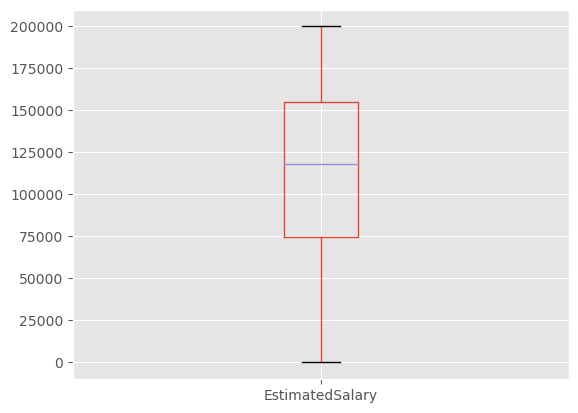

In [79]:
cln.boxplot(column=['EstimatedSalary'])

<Axes: xlabel='EstimatedSalary'>

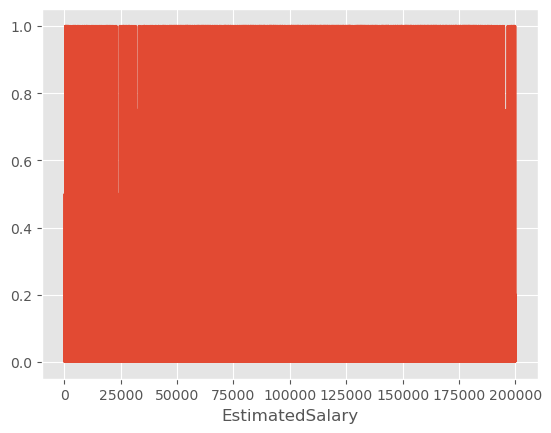

In [80]:
cln.groupby(['EstimatedSalary'])['Exited'].mean().plot()

In [81]:
# no apparent outliers

In [82]:
cln.EstimatedSalary.value_counts()

EstimatedSalary
88890.05     178
140941.47    107
167984.72    100
90876.95      98
129964.94     98
            ... 
102747.73      1
170593.45      1
109179.48      1
60538.47       1
71173.03       1
Name: count, Length: 55298, dtype: int64

In [83]:
outcome = 'Exited'
x_cols = cln.drop("Exited", axis=1)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model1 = ols(formula=formula, data=cln).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Exited   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     3810.
Date:                Thu, 22 Feb 2024   Prob (F-statistic):               0.00
Time:                        06:34:30   Log-Likelihood:                -64741.
No. Observations:              165034   AIC:                         1.295e+05
Df Residuals:                  165020   BIC:                         1.297e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0195      0.023      0.855      0.392      -0.025       0.064
Geography[T.Germany]     0.1894      0.003     69.476      0.000       0.184       0.195
Geography[T.Spain]       0.0037      0.002      1.670      0.095      -0.001       0.008
Gender[T.Male]          -0.0901      0.002    -50.469      0.000      -0.094      -0.087
CreditScore           6.715e-05   6.31e-05      1.063      0.288   -5.66e-05       0.000
Age                      0.0139      0.000    138.603      0.000       0.014       0.014
Tenure                  -0.0021      0.000     -6.584      0.000      -0.003      -0.001
Balance               3.498e-08   5.22e-08      0.671      0.502   -6.72e-08    1.37e-07
NumOfProducts           -0.1317      0.002    -74.691      0.000      -0.135      -0.128
HasCrCard               -0.0202      0.002     -9.874      0.000      -0.024      -0.016
IsActiveMember          -0.1591      0.002    -90.000      0.000      -0.163      -0.156
EstimatedSalary       1.251e-07   1.75e-08      7.133      0.000    9.07e-08    1.59e-07
credit_classs           -0.0082      0.003     -2.692      0.007      -0.014      -0.002
HasBalance              -0.0555      0.007     -8.246      0.000      -0.069      -0.042
==============================================================================
Omnibus:                    20609.073   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29234.351
Skew:                           1.015   Prob(JB):                         0.00
Kurtosis:                       3.357   Cond. No.                     3.55e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.55e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
# Credit Score and Balance seem to have little effect on customer exiting

<Figure size 1200x800 with 0 Axes>

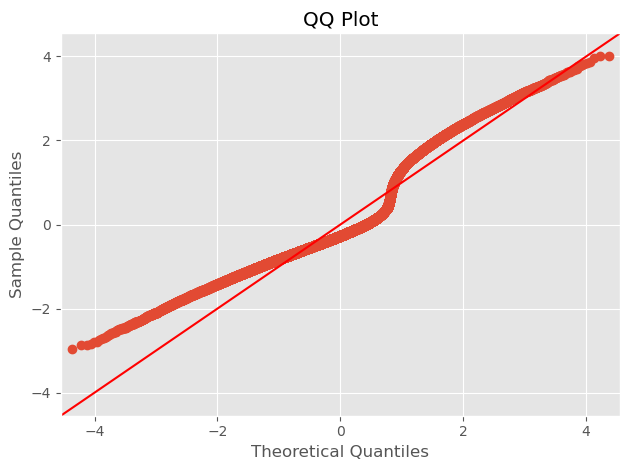

In [85]:
plt.figure(figsize=(12, 8))
fig = sm.graphics.qqplot(model1.resid, dist=stats.norm, line='45', fit=True)
plt.title('QQ Plot')
plt.tight_layout()
plt.show()

In [86]:
# Investigate Multicollinearity assumption

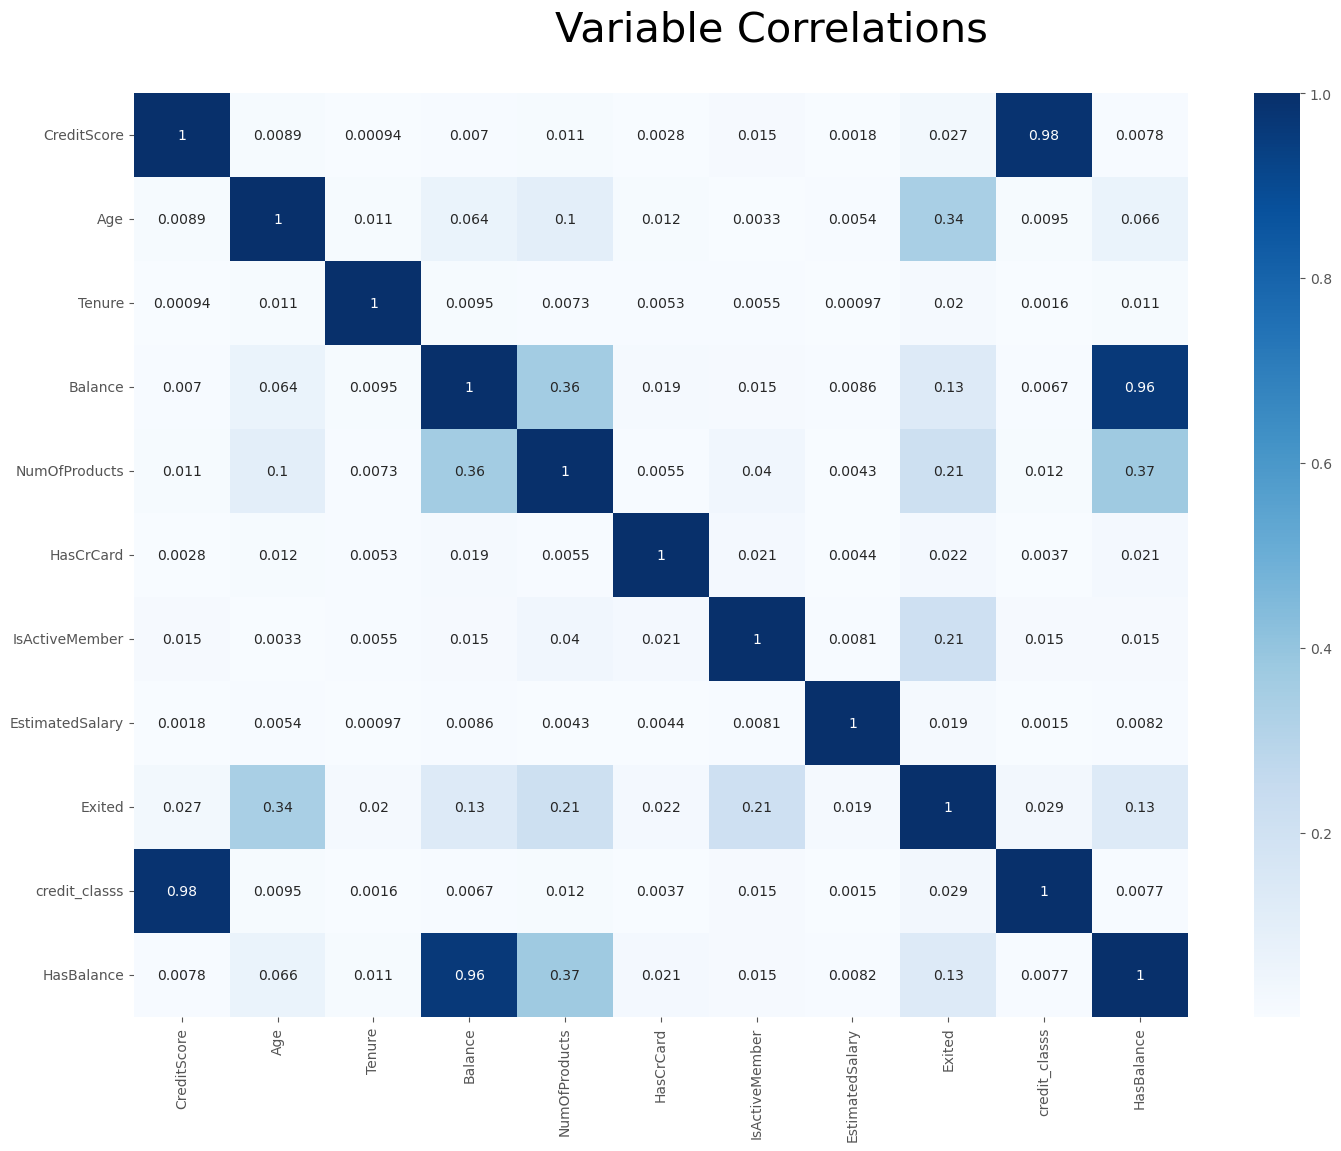

In [87]:
corr = cln.select_dtypes('number').corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=30, y=.95)
heatmap = sns.heatmap(corr, cmap='Blues', annot=True)

In [88]:
print(corr['Exited'])

CreditScore        0.027383
Age                0.340768
Tenure             0.019565
Balance            0.129743
NumOfProducts      0.214554
HasCrCard          0.022141
IsActiveMember     0.210237
EstimatedSalary    0.018827
Exited             1.000000
credit_classs      0.028553
HasBalance         0.133346
Name: Exited, dtype: float64


In [89]:
features = []
correlations = []
for idx, correlation in corr['Exited'].T.items():
    if correlation >= .05 and idx != 'Exited':
        features.append(idx)
        correlations.append(correlation)
corr_with_price = pd.DataFrame({'Correlations':correlations, 'Features': features})

Multicollinear_Features = []
Multicollinear_Corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.items():
        if correlation >= .80 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame({'Correlations':Multicollinear_Corr, 'Features': Multicollinear_Features})
print('Multicollinear Features')
display(MC_df)
print('Correlations with Exited')
display(corr_with_price)

Multicollinear Features


Correlations                      Features
0      0.984683  [CreditScore, credit_classs]
1      0.963088         [Balance, HasBalance]
2      0.984683  [credit_classs, CreditScore]
3      0.963088         [HasBalance, Balance]

Correlations with Exited


Correlations        Features
0      0.340768             Age
1      0.129743         Balance
2      0.214554   NumOfProducts
3      0.210237  IsActiveMember
4      0.133346      HasBalance

In [90]:
## need to look up interaction of features!

In [91]:
regression = LinearRegression()

In [92]:
cln.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165034 entries, 0 to 165033
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  float64
 11  credit_classs    165034 non-null  int32  
 12  HasBalance       165034 non-null  int32  
dtypes: float64(6), int32(2), int64(3), object(2)
memory usage: 16.4+ MB


In [93]:
cln[['Tenure', 'NumOfProducts', 'credit_classs', 'HasBalance']] = cln[['Tenure', 'NumOfProducts', 'credit_classs', 'HasBalance']].astype(float)

C:\Users\p_ste\AppData\Local\Temp\ipykernel_26768\3307268223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln[['Tenure', 'NumOfProducts', 'credit_classs', 'HasBalance']] = cln[['Tenure', 'NumOfProducts', 'credit_classs', 'HasBalance']].astype(float)


In [94]:
cln.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165034 entries, 0 to 165033
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  float64
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  float64
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  float64
 11  credit_classs    165034 non-null  float64
 12  HasBalance       165034 non-null  float64
dtypes: float64(10), int64(1), object(2)
memory usage: 17.6+ MB


In [95]:
cln.Geography.value_counts()

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

In [96]:
inter = cln

continuous = ['CreditScore', 'Age', 'EstimatedSalary']

categoricals = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'credit_classs']

notmod = ['Balance', 'HasCrCard', 'IsActiveMember', 'Exited', 'HasBalance']

inter_cont = inter[continuous]

In [97]:
# log features
log_names = [f"{column}_log" for column in inter_cont.columns]

inter_log = np.log(inter_cont)
inter_log.columns = log_names

In [98]:
# normalize (subract mean and divide by std)


def normalize(feature):
    return (feature - feature.mean()) / feature.std()


inter_log_norm = inter_log.apply(normalize)

In [99]:
# one hot encode categoricals
inter_ohe = pd.get_dummies(inter, columns = categoricals, drop_first = True, dummy_na=False, dtype = float )

inter_notmod = inter[notmod]

In [100]:
preprocessed = pd.concat([inter_notmod, inter_log_norm, inter_ohe], axis=1)

X = preprocessed.drop("Exited", axis=1)
y = preprocessed["Exited"]

In [101]:
preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165034 entries, 0 to 165033
Data columns (total 43 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Balance              165034 non-null  float64
 1   HasCrCard            165034 non-null  float64
 2   IsActiveMember       165034 non-null  float64
 3   Exited               165034 non-null  float64
 4   HasBalance           165034 non-null  float64
 5   CreditScore_log      165034 non-null  float64
 6   Age_log              165034 non-null  float64
 7   EstimatedSalary_log  165034 non-null  float64
 8   CreditScore          165034 non-null  int64  
 9   Age                  165034 non-null  float64
 10  Balance              165034 non-null  float64
 11  HasCrCard            165034 non-null  float64
 12  IsActiveMember       165034 non-null  float64
 13  EstimatedSalary      165034 non-null  float64
 14  Exited               165034 non-null  float64
 15  HasBalance           1

In [102]:
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X, y, scoring="r2", cv=crossvalidation))

baseline

0.32154437047913037

In [103]:
print(list(preprocessed))

['Balance', 'HasCrCard', 'IsActiveMember', 'Exited', 'HasBalance', 'CreditScore_log', 'Age_log', 'EstimatedSalary_log', 'CreditScore', 'Age', 'Balance', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'HasBalance', 'Geography_Germany', 'Geography_Spain', 'Gender_Male', 'Tenure_1.0', 'Tenure_2.0', 'Tenure_3.0', 'Tenure_4.0', 'Tenure_5.0', 'Tenure_6.0', 'Tenure_7.0', 'Tenure_8.0', 'Tenure_9.0', 'Tenure_10.0', 'NumOfProducts_2.0', 'NumOfProducts_3.0', 'NumOfProducts_4.0', 'credit_classs_1.0', 'credit_classs_2.0', 'credit_classs_3.0', 'credit_classs_4.0', 'credit_classs_5.0', 'credit_classs_6.0', 'credit_classs_7.0', 'credit_classs_8.0', 'credit_classs_9.0', 'credit_classs_10.0', 'credit_classs_11.0']


In [104]:
preprocessed = preprocessed.rename(columns = {'Tenure_1.0':'Tenure_1',
                                              'Tenure_2.0':'Tenure_2',
                                              'Tenure_3.0':'Tenure_3',
                                              'Tenure_4.0':'Tenure_4',
                                              'Tenure_5.0':'Tenure_5',
                                              'Tenure_6.0':'Tenure_6',
                                              'Tenure_7.0':'Tenure_7',
                                              'Tenure_8.0':'Tenure_8',
                                              'Tenure_9.0':'Tenure_9',
                                              'Tenure_10.0':'Tenure_10',
                                              'NumOfProducts_2.0':'NumOfProducts_2',
                                              'NumOfProducts_3.0':'NumOfProducts_3',
                                              'NumOfProducts_4.0':'NumOfProducts_4',
                                              'credit_classs_1.0':'credit_classs_1',
                                              'credit_classs_2.0':'credit_classs_2',
                                              'credit_classs_3.0':'credit_classs_3',
                                              'credit_classs_4.0':'credit_classs_4',
                                              'credit_classs_5.0':'credit_classs_5',
                                              'credit_classs_6.0':'credit_classs_6',
                                              'credit_classs_7.0':'credit_classs_7',
                                              'credit_classs_8.0':'credit_classs_8',
                                              'credit_classs_9.0':'credit_classs_9',
                                              'credit_classs_10.0':'credit_classs_10',
                                              'credit_classs_11.0':'credit_classs_11'})

In [105]:
preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165034 entries, 0 to 165033
Data columns (total 43 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Balance              165034 non-null  float64
 1   HasCrCard            165034 non-null  float64
 2   IsActiveMember       165034 non-null  float64
 3   Exited               165034 non-null  float64
 4   HasBalance           165034 non-null  float64
 5   CreditScore_log      165034 non-null  float64
 6   Age_log              165034 non-null  float64
 7   EstimatedSalary_log  165034 non-null  float64
 8   CreditScore          165034 non-null  int64  
 9   Age                  165034 non-null  float64
 10  Balance              165034 non-null  float64
 11  HasCrCard            165034 non-null  float64
 12  IsActiveMember       165034 non-null  float64
 13  EstimatedSalary      165034 non-null  float64
 14  Exited               165034 non-null  float64
 15  HasBalance           1

In [106]:
preprocessed['Balance'].describe()

Balance        Balance
count  165034.000000  165034.000000
mean    55479.086689   55479.086689
std     62817.663278   62817.663278
min         1.000000       1.000000
25%         1.000000       1.000000
50%         1.000000       1.000000
75%    119940.517500  119940.517500
max    250899.090000  250899.090000

In [107]:
preprocessed = preprocessed.loc[:,~preprocessed.columns.duplicated()].copy()

In [108]:
preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165034 entries, 0 to 165033
Data columns (total 38 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Balance              165034 non-null  float64
 1   HasCrCard            165034 non-null  float64
 2   IsActiveMember       165034 non-null  float64
 3   Exited               165034 non-null  float64
 4   HasBalance           165034 non-null  float64
 5   CreditScore_log      165034 non-null  float64
 6   Age_log              165034 non-null  float64
 7   EstimatedSalary_log  165034 non-null  float64
 8   CreditScore          165034 non-null  int64  
 9   Age                  165034 non-null  float64
 10  EstimatedSalary      165034 non-null  float64
 11  Geography_Germany    165034 non-null  float64
 12  Geography_Spain      165034 non-null  float64
 13  Gender_Male          165034 non-null  float64
 14  Tenure_1             165034 non-null  float64
 15  Tenure_2             1

In [109]:
preprocessed2 = preprocessed.drop(columns=['CreditScore','Age','EstimatedSalary'])

In [110]:
outcome = 'Exited'
x_cols = preprocessed2.drop("Exited", axis=1)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model2 = ols(formula=formula, data=preprocessed2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Exited   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     2277.
Date:                Thu, 22 Feb 2024   Prob (F-statistic):               0.00
Time:                        06:34:34   Log-Likelihood:                -54650.
No. Observations:              165034   AIC:                         1.094e+05
Df Residuals:                  164999   BIC:                         1.097e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.5385      0.081      6.642      0.000       0.380       0.697
Balance              6.083e-09   4.91e-08      0.124      0.901   -9.01e-08    1.02e-07
HasCrCard              -0.0184      0.002     -9.563      0.000      -0.022      -0.015
IsActiveMember         -0.1372      0.002    -82.252      0.000      -0.140      -0.134
HasBalance             -0.1200      0.006    -18.908      0.000      -0.132      -0.108
CreditScore_log         0.0070      0.005      1.463      0.143      -0.002       0.016
Age_log                 0.1029      0.001    121.407      0.000       0.101       0.105
EstimatedSalary_log     0.0038      0.001      4.573      0.000       0.002       0.005
Geography_Germany       0.2041      0.003     79.490      0.000       0.199       0.209
Geography_Spain         0.0026      0.002      1.268      0.205      -0.001       0.007
Gender_Male            -0.0806      0.002    -47.970      0.000      -0.084      -0.077
Tenure_1               -0.0223      0.005     -4.113      0.000      -0.033      -0.012
Tenure_2               -0.0319      0.005     -5.916      0.000      -0.042      -0.021
Tenure_3               -0.0188      0.005     -3.461      0.001      -0.029      -0.008
Tenure_4               -0.0162      0.005     -2.997      0.003      -0.027      -0.006
Tenure_5               -0.0222      0.005     -4.100      0.000      -0.033      -0.012
Tenure_6               -0.0336      0.005     -6.145      0.000      -0.044      -0.023
Tenure_7               -0.0388      0.005     -7.200      0.000      -0.049      -0.028
Tenure_8               -0.0354      0.005     -6.554      0.000      -0.046      -0.025
Tenure_9               -0.0309      0.005     -5.696      0.000      -0.042      -0.020
Tenure_10              -0.0314      0.006     -4.851      0.000      -0.044      -0.019
NumOfProducts_2        -0.2686      0.002   -141.304      0.000      -0.272      -0.265
NumOfProducts_3         0.4276      0.006     66.677      0.000       0.415       0.440
NumOfProducts_4         0.4088      0.016     26.326      0.000       0.378       0.439
credit_classs_1        -0.1087      0.095     -1.142      0.253      -0.295       0.078
credit_classs_2         0.0111      0.079      0.142      0.887      -0.143       0.165
credit_classs_3        -0.0079      0.078     -0.101      0.920      -0.162       0.146
credit_classs_4        -0.0005      0.079     -0.006      0.995      -0.155       0.154
credit_classs_5        -0.0178      0.080     -0.223      0.823      -0.174       0.138
credit_classs_6        -0.0245      0.081     -0.304      0.761      -0.182       0.133
credit_classs_7        -0.0441      0.081     -0.542      0.588      -0.204       0.115
credit_classs_8        -0.0441      0.082     -0.536      0.592      -0.205       0.117
cre

<Figure size 1200x800 with 0 Axes>

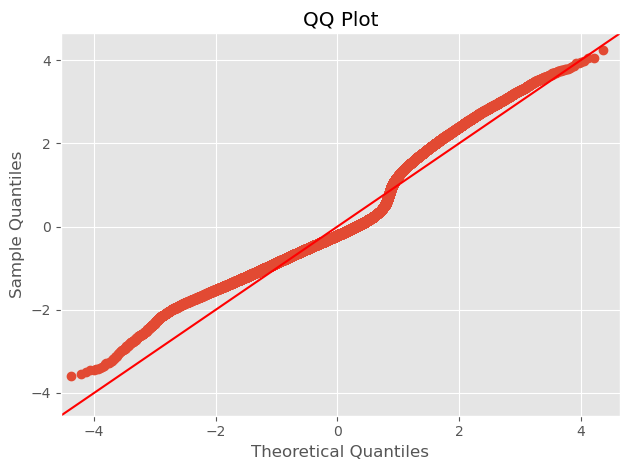

In [111]:
plt.figure(figsize=(12, 8))
fig = sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True)
plt.title('QQ Plot')
plt.tight_layout()
plt.show()

In [112]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linreg = LinearRegression()

In [113]:
#Split features and target
X = preprocessed2.drop(columns=['Exited'], axis=1)
y = preprocessed2.Exited

#Utilize cross validation to determine baseline score
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(linreg, X, y, scoring='r2', cv=crossvalidation))

from itertools import combinations
interactions = []
feat_combinations = combinations(X.columns, 2)
data = X.copy()
for i, (a, b) in enumerate(feat_combinations):
    data['interaction'] = data[a] * data[b]
    score = np.mean(cross_val_score(linreg, data, y, scoring='r2', cv=crossvalidation))
    if score > baseline:
        interactions.append((a, b, round(score,3)))
    
    if i % 50 == 0:
        print(i)
            
print('Top 20 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:20])

0
50
100
150
200
250
300
350
400
450
500
550
Top 20 interactions: [('Age_log', 'NumOfProducts_2', 0.335), ('IsActiveMember', 'Age_log', 0.334), ('IsActiveMember', 'NumOfProducts_2', 0.327), ('Balance', 'NumOfProducts_2', 0.325), ('HasBalance', 'NumOfProducts_2', 0.325), ('Age_log', 'Geography_Germany', 0.322), ('Gender_Male', 'NumOfProducts_2', 0.322), ('IsActiveMember', 'Geography_Germany', 0.321), ('Age_log', 'Gender_Male', 0.321), ('Balance', 'IsActiveMember', 0.32), ('Balance', 'Age_log', 0.32), ('IsActiveMember', 'HasBalance', 0.32), ('IsActiveMember', 'Gender_Male', 0.32), ('HasBalance', 'Age_log', 0.32), ('Balance', 'HasCrCard', 0.319), ('Balance', 'Geography_Spain', 0.319), ('Balance', 'Gender_Male', 0.319), ('Balance', 'Tenure_8', 0.319), ('Balance', 'NumOfProducts_3', 0.319), ('Balance', 'credit_classs_3', 0.319)]


In [114]:
## add interactions above .321

preprocessed3 = preprocessed2
preprocessed3['age_numprod2']= preprocessed['Age_log'] * preprocessed['NumOfProducts_2']
preprocessed3['active_age']= preprocessed['IsActiveMember'] * preprocessed['Age_log']
preprocessed3['active_numprod2']= preprocessed['IsActiveMember'] * preprocessed['NumOfProducts_2']
preprocessed3['bal_numprod2']= preprocessed['Balance'] * preprocessed['NumOfProducts_2']
preprocessed3['hsbal_numprod2']= preprocessed['HasBalance'] * preprocessed['NumOfProducts_2']
preprocessed3['age_germ']= preprocessed['Age_log'] * preprocessed['Geography_Germany']
preprocessed3['gen_numprod2']= preprocessed['Gender_Male'] * preprocessed['NumOfProducts_2']
preprocessed3['act_germ']= preprocessed['IsActiveMember'] * preprocessed['Geography_Germany']
preprocessed3['age_male']= preprocessed['Age_log'] * preprocessed['Gender_Male']


In [115]:
outcome = 'Exited'
x_cols = preprocessed3.drop("Exited", axis=1)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model3 = ols(formula=formula, data=preprocessed3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Exited   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     2201.
Date:                Thu, 22 Feb 2024   Prob (F-statistic):               0.00
Time:                        06:46:38   Log-Likelihood:                -48990.
No. Observations:              165034   AIC:                         9.807e+04
Df Residuals:                  164990   BIC:                         9.851e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.5887      0.078      7.513      0.000       0.435       0.742
Balance              8.585e-08   5.64e-08      1.522      0.128   -2.47e-08    1.96e-07
HasCrCard              -0.0187      0.002    -10.025      0.000      -0.022      -0.015
IsActiveMember         -0.1778      0.003    -69.576      0.000      -0.183      -0.173
HasBalance             -0.1804      0.007    -24.498      0.000      -0.195      -0.166
CreditScore_log         0.0072      0.005      1.544      0.122      -0.002       0.016
Age_log                 0.1818      0.002    104.382      0.000       0.178       0.185
EstimatedSalary_log     0.0033      0.001      4.056      0.000       0.002       0.005
Geography_Germany       0.1912      0.003     60.427      0.000       0.185       0.197
Geography_Spain         0.0031      0.002      1.527      0.127      -0.001       0.007
Gender_Male            -0.1119      0.002    -47.954      0.000      -0.116      -0.107
Tenure_1               -0.0251      0.005     -4.788      0.000      -0.035      -0.015
Tenure_2               -0.0340      0.005     -6.527      0.000      -0.044      -0.024
Tenure_3               -0.0211      0.005     -4.018      0.000      -0.031      -0.011
Tenure_4               -0.0181      0.005     -3.467      0.001      -0.028      -0.008
Tenure_5               -0.0245      0.005     -4.690      0.000      -0.035      -0.014
Tenure_6               -0.0349      0.005     -6.615      0.000      -0.045      -0.025
Tenure_7               -0.0386      0.005     -7.403      0.000      -0.049      -0.028
Tenure_8               -0.0364      0.005     -6.974      0.000      -0.047      -0.026
Tenure_9               -0.0311      0.005     -5.920      0.000      -0.041      -0.021
Tenure_10              -0.0329      0.006     -5.263      0.000      -0.045      -0.021
NumOfProducts_2        -0.4316      0.003   -124.436      0.000      -0.438      -0.425
NumOfProducts_3         0.3833      0.006     61.705      0.000       0.371       0.396
NumOfProducts_4         0.3642      0.015     24.262      0.000       0.335       0.394
credit_classs_1        -0.1006      0.092     -1.094      0.274      -0.281       0.080
credit_classs_2         0.0347      0.076      0.457      0.648      -0.114       0.184
credit_classs_3         0.0135      0.076      0.178      0.859      -0.135       0.162
credit_classs_4         0.0190      0.076      0.249      0.803      -0.131       0.169
credit_classs_5         0.0020      0.077      0.026      0.979      -0.149       0.153
credit_classs_6        -0.0052      0.078     -0.066      0.947      -0.158       0.147
credit_classs_7        -0.0237      0.079     -0.301      0.764      -0.178       0.130
credit_classs_8        -0.0236      0.079     -0.297      0.767      -0.179       0.132
cre

<Figure size 1200x800 with 0 Axes>

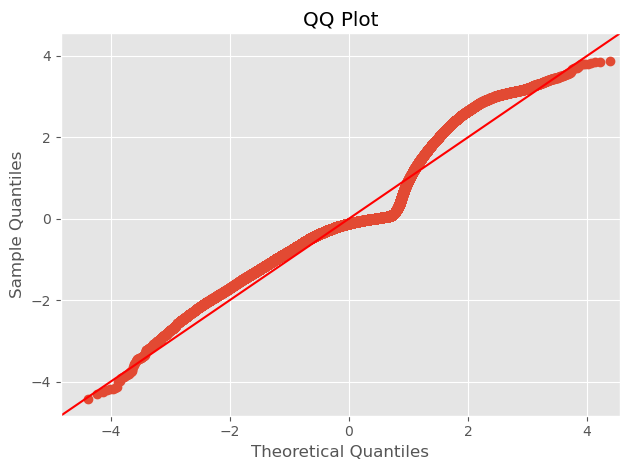

In [116]:
plt.figure(figsize=(12, 8))
fig = sm.graphics.qqplot(model3.resid, dist=stats.norm, line='45', fit=True)
plt.title('QQ Plot')
plt.tight_layout()
plt.show()

In [117]:
# Model 3 is much improved on model 2 with an r2 increase to .365 from .319 
# but some increase to the durban-watson, JB, Condition Number, Skew and Curtosis
# this could largely be due to multicollinarity

# the credit score is insignificant, and even when scaled this feature remains insignificant so we will remove

In [118]:
preprocessed4 = preprocessed3.drop(columns = ['CreditScore_log', 'credit_classs_1', 'credit_classs_2', 'credit_classs_3', 'credit_classs_4',
                                             'credit_classs_5', 'credit_classs_6', 'credit_classs_7', 'credit_classs_8', 'credit_classs_9',
                                             'credit_classs_10', 'credit_classs_11'])

In [119]:
outcome = 'Exited'
x_cols = preprocessed4.drop("Exited", axis=1)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model4 = ols(formula=formula, data=preprocessed4).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Exited   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     3047.
Date:                Thu, 22 Feb 2024   Prob (F-statistic):               0.00
Time:                        06:46:40   Log-Likelihood:                -49053.
No. Observations:              165034   AIC:                         9.817e+04
Df Residuals:                  165002   BIC:                         9.849e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.5770      0.005    105.908      0.000       0.566       0.588
Balance              8.568e-08   5.64e-08      1.519      0.129   -2.49e-08    1.96e-07
HasCrCard              -0.0189      0.002    -10.141      0.000      -0.023      -0.015
IsActiveMember         -0.1780      0.003    -69.639      0.000      -0.183      -0.173
HasBalance             -0.1807      0.007    -24.529      0.000      -0.195      -0.166
Age_log                 0.1819      0.002    104.418      0.000       0.179       0.185
EstimatedSalary_log     0.0032      0.001      3.994      0.000       0.002       0.005
Geography_Germany       0.1913      0.003     60.435      0.000       0.185       0.197
Geography_Spain         0.0031      0.002      1.559      0.119      -0.001       0.007
Gender_Male            -0.1120      0.002    -47.986      0.000      -0.117      -0.107
Tenure_1               -0.0251      0.005     -4.775      0.000      -0.035      -0.015
Tenure_2               -0.0340      0.005     -6.527      0.000      -0.044      -0.024
Tenure_3               -0.0210      0.005     -4.004      0.000      -0.031      -0.011
Tenure_4               -0.0182      0.005     -3.484      0.000      -0.028      -0.008
Tenure_5               -0.0243      0.005     -4.655      0.000      -0.035      -0.014
Tenure_6               -0.0350      0.005     -6.622      0.000      -0.045      -0.025
Tenure_7               -0.0386      0.005     -7.409      0.000      -0.049      -0.028
Tenure_8               -0.0364      0.005     -6.974      0.000      -0.047      -0.026
Tenure_9               -0.0312      0.005     -5.934      0.000      -0.041      -0.021
Tenure_10              -0.0327      0.006     -5.224      0.000      -0.045      -0.020
NumOfProducts_2        -0.4322      0.003   -124.574      0.000      -0.439      -0.425
NumOfProducts_3         0.3836      0.006     61.734      0.000       0.371       0.396
NumOfProducts_4         0.3644      0.015     24.270      0.000       0.335       0.394
age_numprod2           -0.0902      0.002    -54.020      0.000      -0.093      -0.087
active_age             -0.0739      0.002    -44.623      0.000      -0.077      -0.071
active_numprod2         0.1145      0.003     34.662      0.000       0.108       0.121
bal_numprod2        -1.976e-07   1.04e-07     -1.897      0.058   -4.02e-07    6.61e-09
hsbal_numprod2          0.1856      0.013     14.144      0.000       0.160       0.211
age_germ                0.0470      0.002     23.595      0.000       0.043       0.051
gen_numprod2            0.0754      0.003     22.877      0.000       0.069       0.082
act_germ               -0.0558      0.004    -13.899      0.000      -0.064      -0.048
age_male               -0.0178      0.002    -10.833      0.000      -0.021      -0.015
===

<Figure size 1200x800 with 0 Axes>

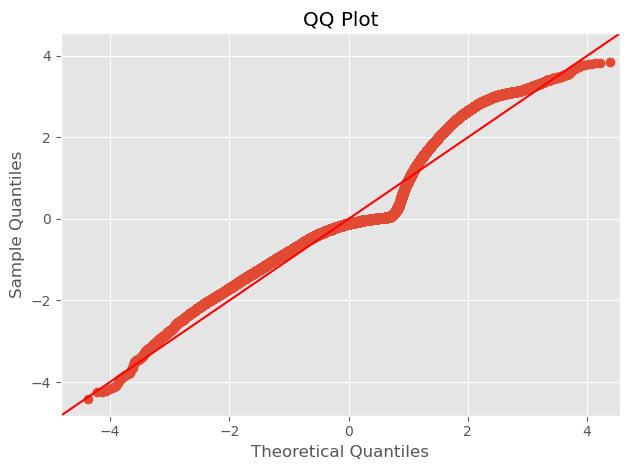

In [120]:
plt.figure(figsize=(12, 8))
fig = sm.graphics.qqplot(model4.resid, dist=stats.norm, line='45', fit=True)
plt.title('QQ Plot')
plt.tight_layout()
plt.show()

In [121]:
# Model 4 is very similar to model 3 with the insignifant features removed.

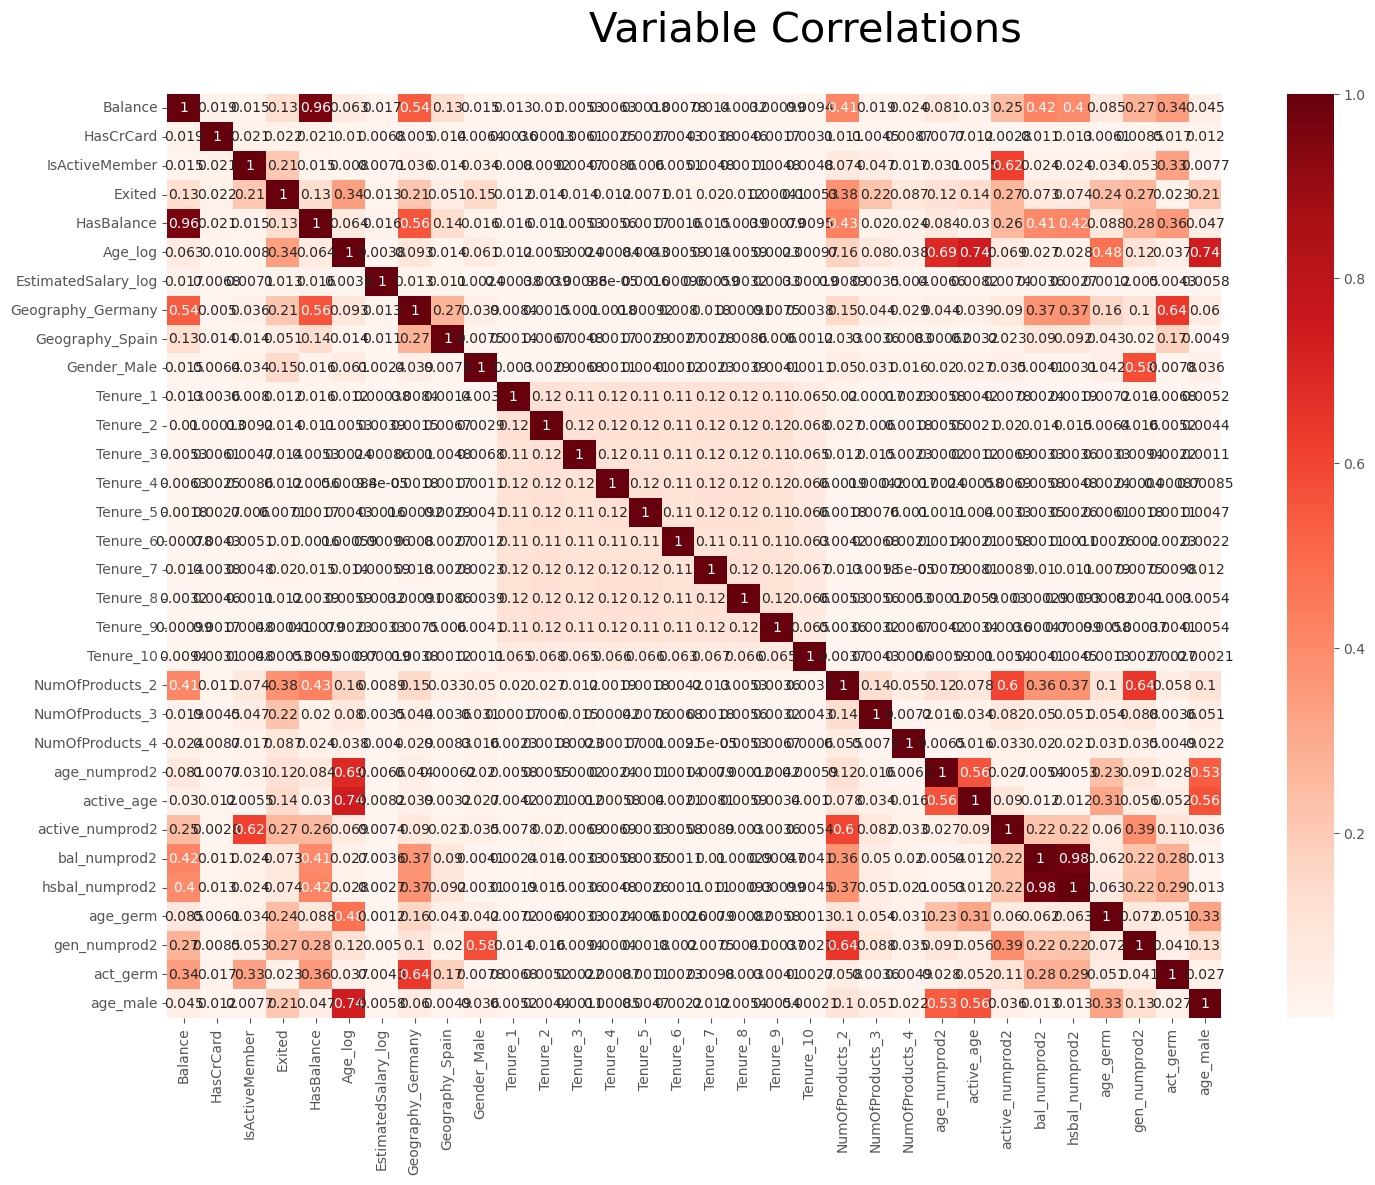

In [122]:
corr = preprocessed4.select_dtypes('number').corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=30, y=.95)
heatmap = sns.heatmap(corr, cmap='Reds', annot=True)

In [123]:
print(corr['Exited'])

Balance                0.129743
HasCrCard              0.022141
IsActiveMember         0.210237
Exited                 1.000000
HasBalance             0.133346
Age_log                0.337053
EstimatedSalary_log    0.013460
Geography_Germany      0.211054
Geography_Spain        0.051175
Gender_Male            0.146442
Tenure_1               0.011964
Tenure_2               0.014371
Tenure_3               0.014347
Tenure_4               0.012491
Tenure_5               0.007082
Tenure_6               0.010225
Tenure_7               0.020444
Tenure_8               0.011520
Tenure_9               0.000413
Tenure_10              0.000532
NumOfProducts_2        0.378176
NumOfProducts_3        0.219454
NumOfProducts_4        0.087367
age_numprod2           0.118837
active_age             0.142303
active_numprod2        0.265678
bal_numprod2           0.072632
hsbal_numprod2         0.074215
age_germ               0.242997
gen_numprod2           0.268433
act_germ               0.023212
age_male

In [124]:
features = []
correlations = []
for idx, correlation in corr['Exited'].T.items():
    if correlation >= .05 and idx != 'Exited':
        features.append(idx)
        correlations.append(correlation)
corr_with_price = pd.DataFrame({'Correlations':correlations, 'Features': features})

Multicollinear_Features = []
Multicollinear_Corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.items():
        if correlation >= .80 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame({'Correlations':Multicollinear_Corr, 'Features': Multicollinear_Features})
print('Multicollinear Features')
display(MC_df)
print('Correlations with Exited')
display(corr_with_price)

Multicollinear Features


Correlations                        Features
0      0.963088           [Balance, HasBalance]
1      0.963088           [HasBalance, Balance]
2      0.975098  [bal_numprod2, hsbal_numprod2]
3      0.975098  [hsbal_numprod2, bal_numprod2]

Correlations with Exited


Correlations           Features
0       0.129743            Balance
1       0.210237     IsActiveMember
2       0.133346         HasBalance
3       0.337053            Age_log
4       0.211054  Geography_Germany
5       0.051175    Geography_Spain
6       0.146442        Gender_Male
7       0.378176    NumOfProducts_2
8       0.219454    NumOfProducts_3
9       0.087367    NumOfProducts_4
10      0.118837       age_numprod2
11      0.142303         active_age
12      0.265678    active_numprod2
13      0.072632       bal_numprod2
14      0.074215     hsbal_numprod2
15      0.242997           age_germ
16      0.268433       gen_numprod2
17      0.207640           age_male

In [125]:
# we will drop the Balance and the bal_numprod2 features due to multicollinearity
preprocessed5 = preprocessed4.drop(columns=['Balance', 'bal_numprod2', 'Geography_Spain'])

In [126]:
outcome = 'Exited'
x_cols = preprocessed5.drop("Exited", axis=1)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model5 = ols(formula=formula, data=preprocessed5).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Exited   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     3373.
Date:                Thu, 22 Feb 2024   Prob (F-statistic):               0.00
Time:                        06:46:43   Log-Likelihood:                -49056.
No. Observations:              165034   AIC:                         9.817e+04
Df Residuals:                  165005   BIC:                         9.846e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.5780      0.005    106.726      0.000       0.567       0.589
HasCrCard              -0.0189      0.002    -10.167      0.000      -0.023      -0.015
IsActiveMember         -0.1780      0.003    -69.640      0.000      -0.183      -0.173
HasBalance             -0.1702      0.003    -63.852      0.000      -0.175      -0.165
Age_log                 0.1819      0.002    104.430      0.000       0.179       0.185
EstimatedSalary_log     0.0032      0.001      3.977      0.000       0.002       0.005
Geography_Germany       0.1903      0.003     61.185      0.000       0.184       0.196
Gender_Male            -0.1120      0.002    -47.983      0.000      -0.117      -0.107
Tenure_1               -0.0251      0.005     -4.791      0.000      -0.035      -0.015
Tenure_2               -0.0341      0.005     -6.541      0.000      -0.044      -0.024
Tenure_3               -0.0211      0.005     -4.020      0.000      -0.031      -0.011
Tenure_4               -0.0182      0.005     -3.495      0.000      -0.028      -0.008
Tenure_5               -0.0244      0.005     -4.669      0.000      -0.035      -0.014
Tenure_6               -0.0350      0.005     -6.632      0.000      -0.045      -0.025
Tenure_7               -0.0387      0.005     -7.421      0.000      -0.049      -0.028
Tenure_8               -0.0365      0.005     -6.981      0.000      -0.047      -0.026
Tenure_9               -0.0313      0.005     -5.953      0.000      -0.042      -0.021
Tenure_10              -0.0327      0.006     -5.229      0.000      -0.045      -0.020
NumOfProducts_2        -0.4322      0.003   -124.567      0.000      -0.439      -0.425
NumOfProducts_3         0.3836      0.006     61.744      0.000       0.371       0.396
NumOfProducts_4         0.3645      0.015     24.273      0.000       0.335       0.394
age_numprod2           -0.0902      0.002    -54.018      0.000      -0.093      -0.087
active_age             -0.0739      0.002    -44.622      0.000      -0.077      -0.071
active_numprod2         0.1145      0.003     34.661      0.000       0.108       0.121
hsbal_numprod2          0.1617      0.004     44.267      0.000       0.155       0.169
age_germ                0.0470      0.002     23.595      0.000       0.043       0.051
gen_numprod2            0.0754      0.003     22.866      0.000       0.069       0.082
act_germ               -0.0558      0.004    -13.906      0.000      -0.064      -0.048
age_male               -0.0178      0.002    -10.835      0.000      -0.021      -0.015
==============================================================================
Omnibus:                    23440.927   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38304.983
Skew:                         

<Figure size 1200x800 with 0 Axes>

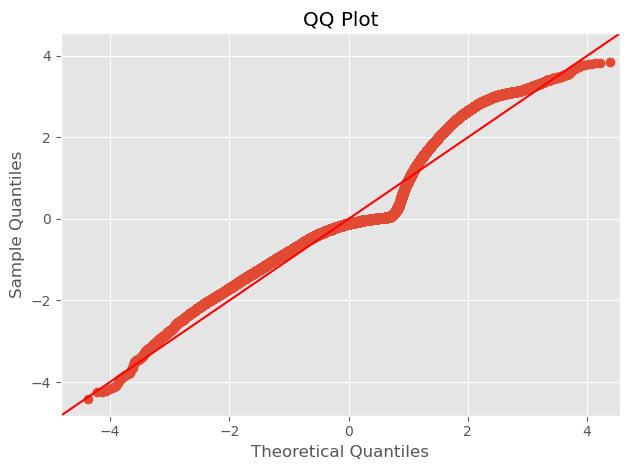

In [127]:
plt.figure(figsize=(12, 8))
fig = sm.graphics.qqplot(model4.resid, dist=stats.norm, line='45', fit=True)
plt.title('QQ Plot')
plt.tight_layout()
plt.show()

<Axes: xlabel='EstimatedSalary_log'>

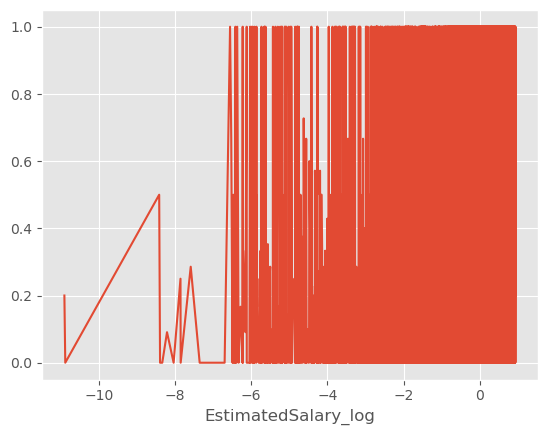

In [128]:
preprocessed5.groupby(['EstimatedSalary_log'])['Exited'].mean().plot()

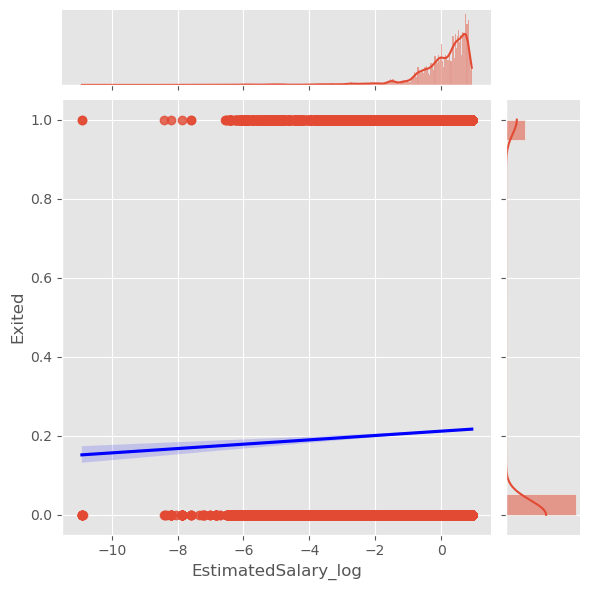

In [129]:
sns.jointplot(data = preprocessed5, x= 'EstimatedSalary_log', y ='Exited', kind='reg', joint_kws={'line_kws':{'color':'blue'}})

<Axes: xlabel='Age_log'>

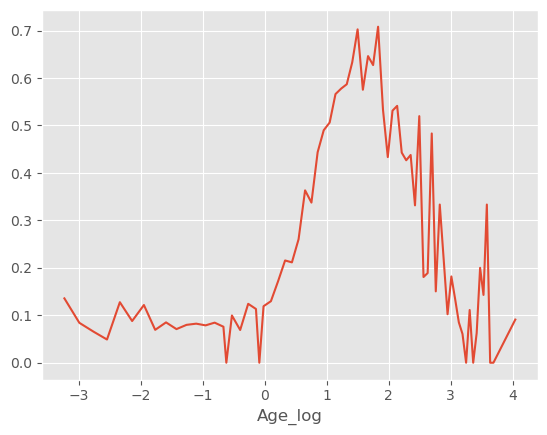

In [130]:
preprocessed5.groupby(['Age_log'])['Exited'].mean().plot()

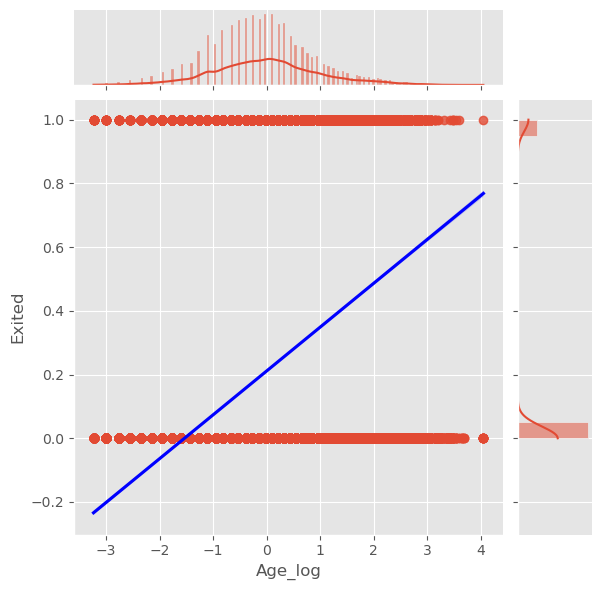

In [131]:
sns.jointplot(data = preprocessed5, x= 'Age_log', y ='Exited', kind='reg', joint_kws={'line_kws':{'color':'blue'}})

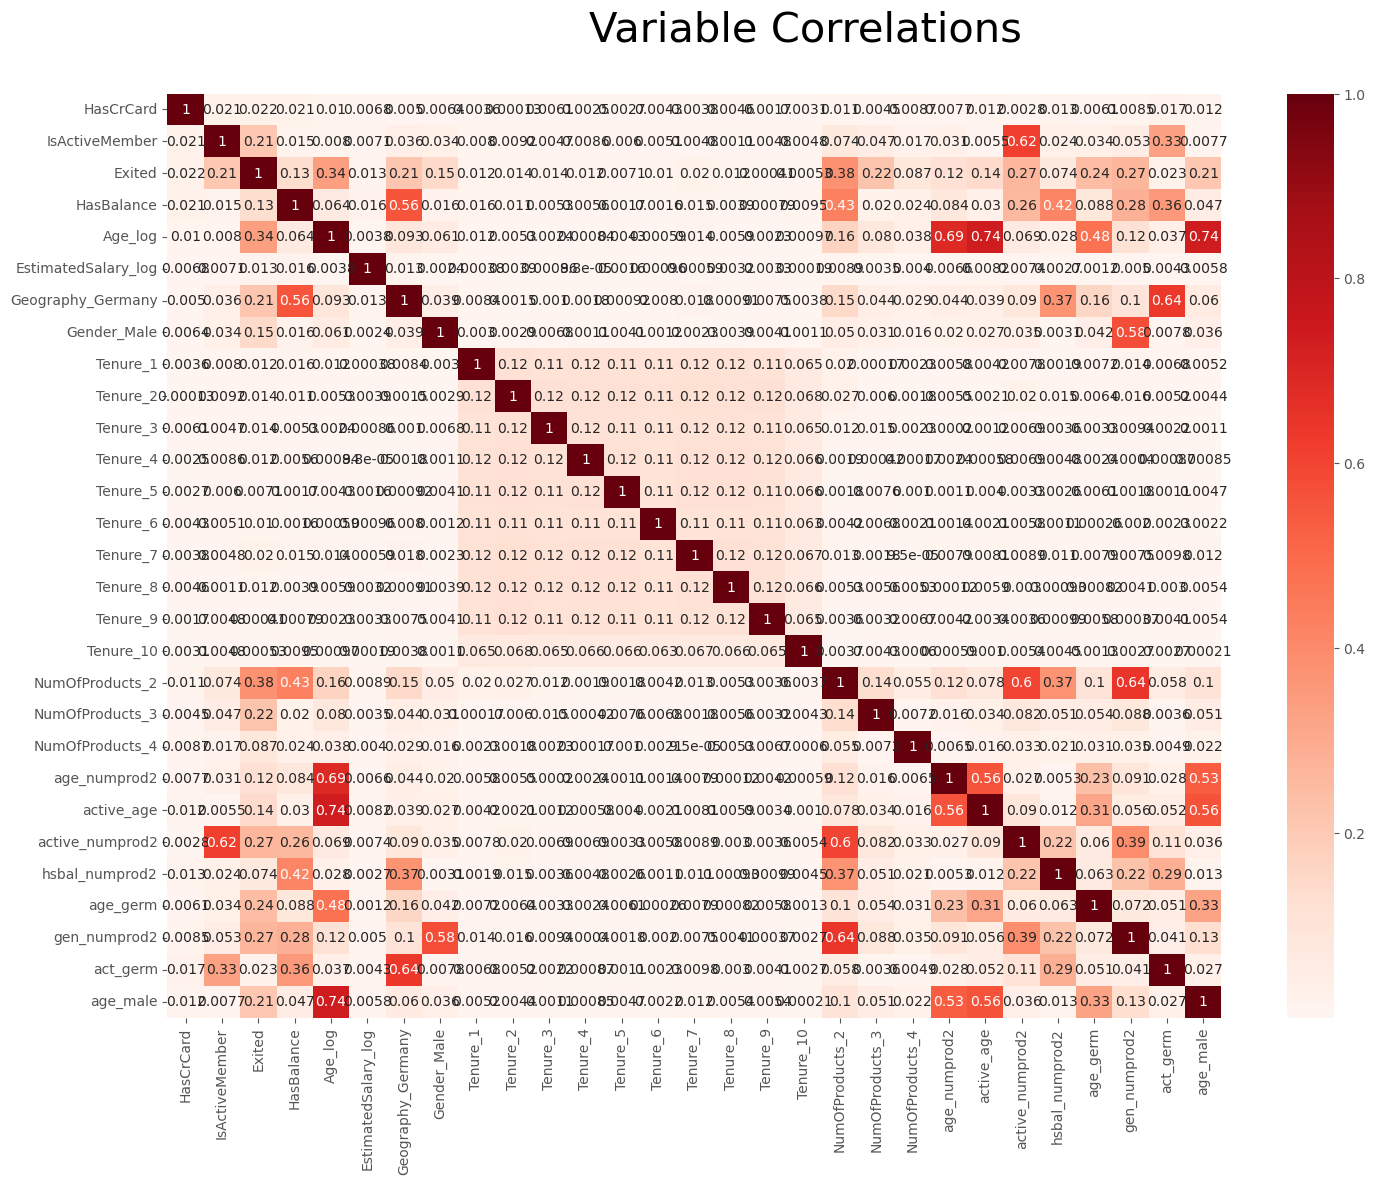

In [132]:
corr = preprocessed5.select_dtypes('number').corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=30, y=.95)
heatmap = sns.heatmap(corr, cmap='Reds', annot=True)

In [133]:
features = []
correlations = []
for idx, correlation in corr['Exited'].T.items():
    if correlation >= .05 and idx != 'Exited':
        features.append(idx)
        correlations.append(correlation)
corr_with_price = pd.DataFrame({'Correlations':correlations, 'Features': features})

Multicollinear_Features = []
Multicollinear_Corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.items():
        if correlation >= .80 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame({'Correlations':Multicollinear_Corr, 'Features': Multicollinear_Features})
print('Multicollinear Features')
display(MC_df)
print('Correlations with Exited')
display(corr_with_price)

Multicollinear Features


Empty DataFrame
Columns: [Correlations, Features]
Index: []

Correlations with Exited


Correlations           Features
0       0.210237     IsActiveMember
1       0.133346         HasBalance
2       0.337053            Age_log
3       0.211054  Geography_Germany
4       0.146442        Gender_Male
5       0.378176    NumOfProducts_2
6       0.219454    NumOfProducts_3
7       0.087367    NumOfProducts_4
8       0.118837       age_numprod2
9       0.142303         active_age
10      0.265678    active_numprod2
11      0.074215     hsbal_numprod2
12      0.242997           age_germ
13      0.268433       gen_numprod2
14      0.207640           age_male

<Axes: xlabel='Age_log'>

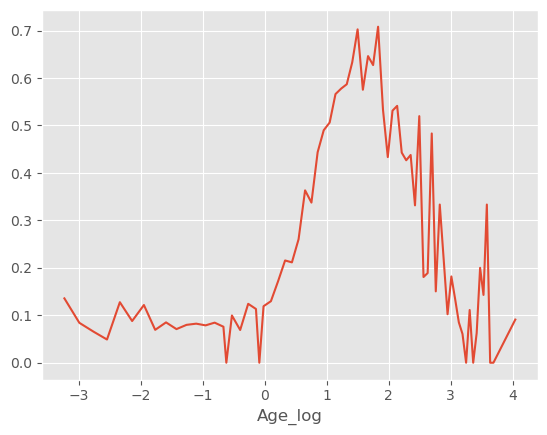

In [134]:
preprocessed5.groupby(['Age_log'])['Exited'].mean().plot()

In [135]:
preprocessed5.head()

HasCrCard  IsActiveMember  Exited  HasBalance   Age_log  \
0        1.0             0.0     0.0         0.0 -0.530636   
1        1.0             1.0     0.0         0.0 -0.530636   
2        1.0             0.0     0.0         0.0  0.327875   
3        1.0             1.0     0.0         1.0 -0.397410   
4        1.0             1.0     0.0         0.0 -0.530636   

   EstimatedSalary_log  Geography_Germany  Gender_Male  Tenure_1  Tenure_2  \
0             0.814346                0.0          1.0       0.0       0.0   
1            -0.761602                0.0          1.0       1.0       0.0   
2             0.836979                0.0          1.0       0.0       0.0   
3            -0.111988                0.0          1.0       0.0       1.0   
4            -2.204672                0.0          1.0       0.0       0.0   

   ...  NumOfProducts_3  NumOfProducts_4  age_numprod2  active_age  \
0  ...              0.0              0.0     -0.530636   -0.000000   
1  ...              0.0              0.0     -0.530636   -0.530636   
2  ...              0.0              0.0      0.327875    0.000000   
3  ...              0.0              0.0     -0.000000   -0.397410   
4  ...              0.0              0.0     -0.530636   -0.530636   

   active_numprod2  hsbal_numprod2  age_germ  gen_numprod2  act_germ  age_male  
0              0.0             0.0      -0.0           1.0       0.0 -0.530636  
1              1.0             0.0      -0.0           1.0       0.0 -0.530636  
2              0.0             0.0       0.0           1.0       0.0  0.327875  
3              0.0             0.0      -0.0           0.0       0.0 -0.397410  
4              1.0             0.0      -0.0           1.0       0.0 -0.530636  

[5 rows x 29 columns]

In [136]:
test = preprocessed5

In [137]:
test.head()

HasCrCard  IsActiveMember  Exited  HasBalance   Age_log  \
0        1.0             0.0     0.0         0.0 -0.530636   
1        1.0             1.0     0.0         0.0 -0.530636   
2        1.0             0.0     0.0         0.0  0.327875   
3        1.0             1.0     0.0         1.0 -0.397410   
4        1.0             1.0     0.0         0.0 -0.530636   

   EstimatedSalary_log  Geography_Germany  Gender_Male  Tenure_1  Tenure_2  \
0             0.814346                0.0          1.0       0.0       0.0   
1            -0.761602                0.0          1.0       1.0       0.0   
2             0.836979                0.0          1.0       0.0       0.0   
3            -0.111988                0.0          1.0       0.0       1.0   
4            -2.204672                0.0          1.0       0.0       0.0   

   ...  NumOfProducts_3  NumOfProducts_4  age_numprod2  active_age  \
0  ...              0.0              0.0     -0.530636   -0.000000   
1  ...              0.0              0.0     -0.530636   -0.530636   
2  ...              0.0              0.0      0.327875    0.000000   
3  ...              0.0              0.0     -0.000000   -0.397410   
4  ...              0.0              0.0     -0.530636   -0.530636   

   active_numprod2  hsbal_numprod2  age_germ  gen_numprod2  act_germ  age_male  
0              0.0             0.0      -0.0           1.0       0.0 -0.530636  
1              1.0             0.0      -0.0           1.0       0.0 -0.530636  
2              0.0             0.0       0.0           1.0       0.0  0.327875  
3              0.0             0.0      -0.0           0.0       0.0 -0.397410  
4              1.0             0.0      -0.0           1.0       0.0 -0.530636  

[5 rows x 29 columns]

In [138]:
test['Age_log_sq']=np.square(test['Age_log'])

In [139]:
test.head()

HasCrCard  IsActiveMember  Exited  HasBalance   Age_log  \
0        1.0             0.0     0.0         0.0 -0.530636   
1        1.0             1.0     0.0         0.0 -0.530636   
2        1.0             0.0     0.0         0.0  0.327875   
3        1.0             1.0     0.0         1.0 -0.397410   
4        1.0             1.0     0.0         0.0 -0.530636   

   EstimatedSalary_log  Geography_Germany  Gender_Male  Tenure_1  Tenure_2  \
0             0.814346                0.0          1.0       0.0       0.0   
1            -0.761602                0.0          1.0       1.0       0.0   
2             0.836979                0.0          1.0       0.0       0.0   
3            -0.111988                0.0          1.0       0.0       1.0   
4            -2.204672                0.0          1.0       0.0       0.0   

   ...  NumOfProducts_4  age_numprod2  active_age  active_numprod2  \
0  ...              0.0     -0.530636   -0.000000              0.0   
1  ...              0.0     -0.530636   -0.530636              1.0   
2  ...              0.0      0.327875    0.000000              0.0   
3  ...              0.0     -0.000000   -0.397410              0.0   
4  ...              0.0     -0.530636   -0.530636              1.0   

   hsbal_numprod2  age_germ  gen_numprod2  act_germ  age_male  Age_log_sq  
0             0.0      -0.0           1.0       0.0 -0.530636    0.281575  
1             0.0      -0.0           1.0       0.0 -0.530636    0.281575  
2             0.0       0.0           1.0       0.0  0.327875    0.107502  
3             0.0      -0.0           0.0       0.0 -0.397410    0.157934  
4             0.0      -0.0           1.0       0.0 -0.530636    0.281575  

[5 rows x 30 columns]

In [140]:
outcome = 'Exited'
x_cols = test.drop("Exited", axis=1)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
modelt = ols(formula=formula, data=test).fit()
modelt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Exited   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     3305.
Date:                Thu, 22 Feb 2024   Prob (F-statistic):               0.00
Time:                        06:47:13   Log-Likelihood:                -48610.
No. Observations:              165034   AIC:                         9.728e+04
Df Residuals:                  165004   BIC:                         9.758e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.5611      0.005    103.329      0.000       0.550       0.572
HasCrCard              -0.0184      0.002     -9.889      0.000      -0.022      -0.015
IsActiveMember         -0.1801      0.003    -70.645      0.000      -0.185      -0.175
HasBalance             -0.1698      0.003    -63.874      0.000      -0.175      -0.165
Age_log                 0.1798      0.002    103.385      0.000       0.176       0.183
EstimatedSalary_log     0.0035      0.001      4.324      0.000       0.002       0.005
Geography_Germany       0.1896      0.003     61.120      0.000       0.184       0.196
Gender_Male            -0.1112      0.002    -47.764      0.000      -0.116      -0.107
Tenure_1               -0.0254      0.005     -4.861      0.000      -0.036      -0.015
Tenure_2               -0.0337      0.005     -6.491      0.000      -0.044      -0.024
Tenure_3               -0.0212      0.005     -4.042      0.000      -0.031      -0.011
Tenure_4               -0.0181      0.005     -3.480      0.001      -0.028      -0.008
Tenure_5               -0.0246      0.005     -4.715      0.000      -0.035      -0.014
Tenure_6               -0.0349      0.005     -6.630      0.000      -0.045      -0.025
Tenure_7               -0.0384      0.005     -7.389      0.000      -0.049      -0.028
Tenure_8               -0.0362      0.005     -6.953      0.000      -0.046      -0.026
Tenure_9               -0.0312      0.005     -5.959      0.000      -0.041      -0.021
Tenure_10              -0.0324      0.006     -5.191      0.000      -0.045      -0.020
NumOfProducts_2        -0.4274      0.003   -123.387      0.000      -0.434      -0.421
NumOfProducts_3         0.3808      0.006     61.444      0.000       0.369       0.393
NumOfProducts_4         0.3626      0.015     24.212      0.000       0.333       0.392
age_numprod2           -0.0835      0.002    -49.674      0.000      -0.087      -0.080
active_age             -0.0814      0.002    -48.735      0.000      -0.085      -0.078
active_numprod2         0.1110      0.003     33.664      0.000       0.105       0.117
hsbal_numprod2          0.1593      0.004     43.709      0.000       0.152       0.166
age_germ                0.0445      0.002     22.405      0.000       0.041       0.048
gen_numprod2            0.0757      0.003     23.040      0.000       0.069       0.082
act_germ               -0.0536      0.004    -13.388      0.000      -0.061      -0.046
age_male               -0.0160      0.002     -9.760      0.000      -0.019      -0.013
Age_log_sq              0.0162      0.001     29.907      0.000       0.015       0.017
==============================================================================
Omnibus:                    23495.309   Durbin-Watson:                   2.004
Prob(Omnibus):       

In [141]:
# adding another dimension to the age decreased the effectiveness of the model 
# but due to the shape of the mean exited plotted through out the age, 
# I am going to try to categorise this for improvement.
# Then check for better interactions

In [142]:
prep5b = preprocessed

In [143]:
prep5b['Age'].describe()

count    165034.000000
mean         38.125888
std           8.867205
min          18.000000
25%          32.000000
50%          37.000000
75%          42.000000
max          92.000000
Name: Age, dtype: float64

In [144]:
# need to see if I can use polynominals on anything, if not then business insights. 
# how do I create a new csv for tableau?

In [145]:
#Create age groups
prep5b['age_u30'] =np.where(prep5b['Age']<30, 1, 0)
prep5b['age_30s'] =np.where((prep5b['Age']>=30) & (prep5b['Age']<40), 1, 0)
prep5b['age_40s'] =np.where((prep5b['Age']>=40) & (prep5b['Age']<50), 1, 0)
prep5b['age_50s'] =np.where((prep5b['Age']>=50) & (prep5b['Age']<60), 1, 0)
prep5b['age_60s'] =np.where((prep5b['Age']>=60) & (prep5b['Age']<70), 1, 0)
prep5b['age_70s'] =np.where((prep5b['Age']>=70) & (prep5b['Age']<80), 1, 0)
prep5b['age_o80'] =np.where((prep5b['Age']>=80), 1, 0)

In [146]:
prep5b.head()

Balance  HasCrCard  IsActiveMember  Exited  HasBalance  CreditScore_log  \
0       1.00        1.0             0.0     0.0         0.0         0.200977   
1       1.00        1.0             1.0     0.0         0.0        -0.306421   
2       1.00        1.0             0.0     0.0         0.0         0.320006   
3  148883.54        1.0             1.0     0.0         1.0        -0.916787   
4       1.00        1.0             1.0     0.0         0.0         0.756841   

    Age_log  EstimatedSalary_log  CreditScore   Age  ...  credit_classs_9  \
0 -0.530636             0.814346          668  33.0  ...              0.0   
1 -0.530636            -0.761602          627  33.0  ...              0.0   
2  0.327875             0.836979          678  40.0  ...              0.0   
3 -0.397410            -0.111988          581  34.0  ...              0.0   
4 -0.530636            -2.204672          716  33.0  ...              0.0   

   credit_classs_10  credit_classs_11  age_u30  age_30s  age_40s  age_50s  \
0               0.0               0.0        0        1        0        0   
1               0.0               0.0        0        1        0        0   
2               0.0               0.0        0        0        1        0   
3               0.0               0.0        0        1        0        0   
4               0.0               0.0        0        1        0        0   

   age_60s  age_70s  age_o80  
0        0        0        0  
1        0        0        0  
2        0        0        0  
3        0        0        0  
4        0        0        0  

[5 rows x 45 columns]

In [147]:
outcome = 'Exited'
x_cols = prep5b.drop("Exited", axis=1)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model5b = ols(formula=formula, data=prep5b).fit()
model5b.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Exited   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     2009.
Date:                Thu, 22 Feb 2024   Prob (F-statistic):               0.00
Time:                        06:47:14   Log-Likelihood:                -51658.
No. Observations:              165034   AIC:                         1.034e+05
Df Residuals:                  164990   BIC:                         1.038e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.7367      0.327     -2.254      0.024      -1.377      -0.096
Balance             -5.472e-09   4.82e-08     -0.114      0.910   -9.99e-08     8.9e-08
HasCrCard              -0.0163      0.002     -8.605      0.000      -0.020      -0.013
IsActiveMember         -0.1333      0.002    -80.964      0.000      -0.137      -0.130
HasBalance             -0.1147      0.006    -18.412      0.000      -0.127      -0.103
CreditScore_log         0.0082      0.039      0.213      0.831      -0.067       0.084
Age_log                -0.1497      0.011    -13.931      0.000      -0.171      -0.129
EstimatedSalary_log    -0.0029      0.002     -1.905      0.057      -0.006    8.44e-05
CreditScore         -7.693e-06      0.000     -0.016      0.987      -0.001       0.001
Age                     0.0293      0.001     21.652      0.000       0.027       0.032
EstimatedSalary      1.534e-07   3.06e-08      5.011      0.000    9.34e-08    2.13e-07
Geography_Germany       0.1932      0.003     76.474      0.000       0.188       0.198
Geography_Spain         0.0010      0.002      0.507      0.612      -0.003       0.005
Gender_Male            -0.0758      0.002    -45.893      0.000      -0.079      -0.073
Tenure_1               -0.0226      0.005     -4.245      0.000      -0.033      -0.012
Tenure_2               -0.0312      0.005     -5.900      0.000      -0.042      -0.021
Tenure_3               -0.0189      0.005     -3.547      0.000      -0.029      -0.008
Tenure_4               -0.0175      0.005     -3.298      0.001      -0.028      -0.007
Tenure_5               -0.0225      0.005     -4.241      0.000      -0.033      -0.012
Tenure_6               -0.0326      0.005     -6.079      0.000      -0.043      -0.022
Tenure_7               -0.0377      0.005     -7.116      0.000      -0.048      -0.027
Tenure_8               -0.0353      0.005     -6.651      0.000      -0.046      -0.025
Tenure_9               -0.0299      0.005     -5.598      0.000      -0.040      -0.019
Tenure_10              -0.0301      0.006     -4.733      0.000      -0.043      -0.018
NumOfProducts_2        -0.2558      0.002   -136.472      0.000      -0.259      -0.252
NumOfProducts_3         0.4097      0.006     65.008      0.000       0.397       0.422
NumOfProducts_4         0.3918      0.015     25.689      0.000       0.362       0.422
credit_classs_1        -0.0871      0.094     -0.929      0.353      -0.271       0.097
credit_classs_2         0.0460      0.081      0.566      0.572      -0.113       0.205
credit_classs_3         0.0251      0.084      0.298      0.766      -0.140       0.190
credit_classs_4         0.0325      0.087      0.372      0.710      -0.139       0.204
credit_classs_5         0.0159      0.090      0.177      0.860      -0.160       0.192
cre

In [148]:
prep5b = prep5b.drop(columns=['CreditScore', 'Age', 'EstimatedSalary'], axis=1)

In [149]:
#Split features and target
X = prep5b.drop(columns=['Exited'], axis=1)
y = prep5b.Exited

#Utilize cross validation to determine baseline score
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(linreg, X, y, scoring='r2', cv=crossvalidation))

from itertools import combinations
interactions = []
feat_combinations = combinations(X.columns, 2)
data = X.copy()
for i, (a, b) in enumerate(feat_combinations):
    data['interaction'] = data[a] * data[b]
    score = np.mean(cross_val_score(linreg, data, y, scoring='r2', cv=crossvalidation))
    if score > baseline:
        interactions.append((a, b, round(score,3)))
    
    if i % 50 == 0:
        print(i)
            
print('Top 20 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:20])

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
Top 20 interactions: [('IsActiveMember', 'Age_log', 0.353), ('Age_log', 'NumOfProducts_2', 0.352), ('Age_log', 'age_40s', 0.351), ('IsActiveMember', 'NumOfProducts_2', 0.349), ('NumOfProducts_2', 'age_40s', 0.349), ('IsActiveMember', 'age_50s', 0.347), ('HasBalance', 'NumOfProducts_2', 0.347), ('NumOfProducts_2', 'age_30s', 0.347), ('Balance', 'NumOfProducts_2', 0.346), ('IsActiveMember', 'age_30s', 0.346), ('IsActiveMember', 'age_40s', 0.344), ('IsActiveMember', 'age_60s', 0.344), ('Gender_Male', 'NumOfProducts_2', 0.344), ('IsActiveMember', 'Geography_Germany', 0.343), ('IsActiveMember', 'age_u30', 0.343), ('Age_log', 'Geography_Germany', 0.343), ('Age_log', 'Gender_Male', 0.343), ('Age_log', 'age_u30', 0.343), ('Geography_Germany', 'age_40s', 0.343), ('NumOfProducts_2', 'age_u30', 0.343)]


In [150]:
## add interactions above .344

preprocessed6 = prep5b
preprocessed6['act_age']= preprocessed6['IsActiveMember'] * preprocessed6['Age_log']
preprocessed6['age_nprod2']= preprocessed6['Age_log'] * preprocessed6['NumOfProducts_2']
preprocessed6['age_40s']= preprocessed6['Age_log'] * preprocessed6['age_40s']
preprocessed6['act_nprod2']= preprocessed6['IsActiveMember'] * preprocessed6['NumOfProducts_2']
preprocessed6['nprod2_40s']= preprocessed6['NumOfProducts_2'] * preprocessed6['age_40s']
preprocessed6['act_50s']= preprocessed6['IsActiveMember'] * preprocessed6['age_50s']
preprocessed6['hbal_nprod2']= preprocessed6['HasBalance'] * preprocessed6['NumOfProducts_2']
preprocessed6['nprod2_30s']= preprocessed6['NumOfProducts_2'] * preprocessed6['age_30s']
preprocessed6['bal_nprod2']= preprocessed6['Balance'] * preprocessed6['NumOfProducts_2']
preprocessed6['act_30s']= preprocessed6['IsActiveMember'] * preprocessed6['age_30s']
preprocessed6['act_40s']= preprocessed6['IsActiveMember'] * preprocessed6['age_40s']
preprocessed6['act_60s']= preprocessed6['IsActiveMember'] * preprocessed6['age_60s']
preprocessed6['m_nprod2']= preprocessed6['Gender_Male'] * preprocessed6['NumOfProducts_2']


In [151]:
outcome = 'Exited'
x_cols = preprocessed6.drop("Exited", axis=1)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model6 = ols(formula=formula, data=preprocessed6).fit()
model6.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Exited   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     1964.
Date:                Thu, 22 Feb 2024   Prob (F-statistic):               0.00
Time:                        07:54:08   Log-Likelihood:                -46036.
No. Observations:              165034   AIC:                         9.218e+04
Df Residuals:                  164980   BIC:                         9.272e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.4392      0.077      5.694      0.000       0.288       0.590
Balance              9.202e-08   5.54e-08      1.661      0.097   -1.66e-08    2.01e-07
HasCrCard              -0.0167      0.002     -9.124      0.000      -0.020      -0.013
IsActiveMember         -0.1628      0.006    -28.727      0.000      -0.174      -0.152
HasBalance             -0.1683      0.007    -23.275      0.000      -0.182      -0.154
CreditScore_log         0.0084      0.005      1.850      0.064      -0.001       0.017
Age_log                 0.0746      0.003     23.101      0.000       0.068       0.081
EstimatedSalary_log     0.0029      0.001      3.651      0.000       0.001       0.004
Geography_Germany       0.1608      0.002     65.069      0.000       0.156       0.166
Geography_Spain         0.0012      0.002      0.612      0.540      -0.003       0.005
Gender_Male            -0.1083      0.002    -47.610      0.000      -0.113      -0.104
Tenure_1               -0.0249      0.005     -4.839      0.000      -0.035      -0.015
Tenure_2               -0.0334      0.005     -6.526      0.000      -0.043      -0.023
Tenure_3               -0.0210      0.005     -4.071      0.000      -0.031      -0.011
Tenure_4               -0.0189      0.005     -3.691      0.000      -0.029      -0.009
Tenure_5               -0.0243      0.005     -4.733      0.000      -0.034      -0.014
Tenure_6               -0.0342      0.005     -6.582      0.000      -0.044      -0.024
Tenure_7               -0.0368      0.005     -7.194      0.000      -0.047      -0.027
Tenure_8               -0.0351      0.005     -6.848      0.000      -0.045      -0.025
Tenure_9               -0.0301      0.005     -5.840      0.000      -0.040      -0.020
Tenure_10              -0.0304      0.006     -4.949      0.000      -0.042      -0.018
NumOfProducts_2        -0.3999      0.004    -90.978      0.000      -0.409      -0.391
NumOfProducts_3         0.3677      0.006     60.217      0.000       0.356       0.380
NumOfProducts_4         0.3520      0.015     23.871      0.000       0.323       0.381
credit_classs_1        -0.0943      0.090     -1.044      0.296      -0.271       0.083
credit_classs_2         0.0715      0.075      0.958      0.338      -0.075       0.218
credit_classs_3         0.0457      0.074      0.614      0.539      -0.100       0.192
credit_classs_4         0.0508      0.075      0.678      0.498      -0.096       0.198
credit_classs_5         0.0345      0.076      0.455      0.649      -0.114       0.183
credit_classs_6         0.0268      0.076      0.350      0.726      -0.123       0.177
credit_classs_7         0.0085      0.077      0.110      0.913      -0.143       0.160
credit_classs_8         0.0078      0.078      0.100      0.920      -0.145       0.161
cre

<Figure size 1200x800 with 0 Axes>

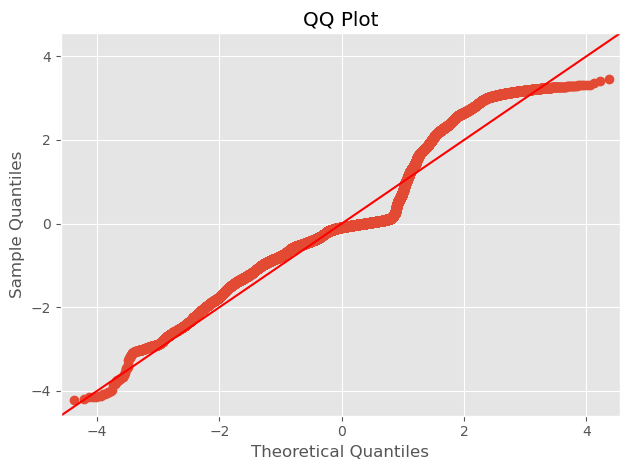

In [152]:
plt.figure(figsize=(12, 8))
fig = sm.graphics.qqplot(model6.resid, dist=stats.norm, line='45', fit=True)
plt.title('QQ Plot')
plt.tight_layout()
plt.show()

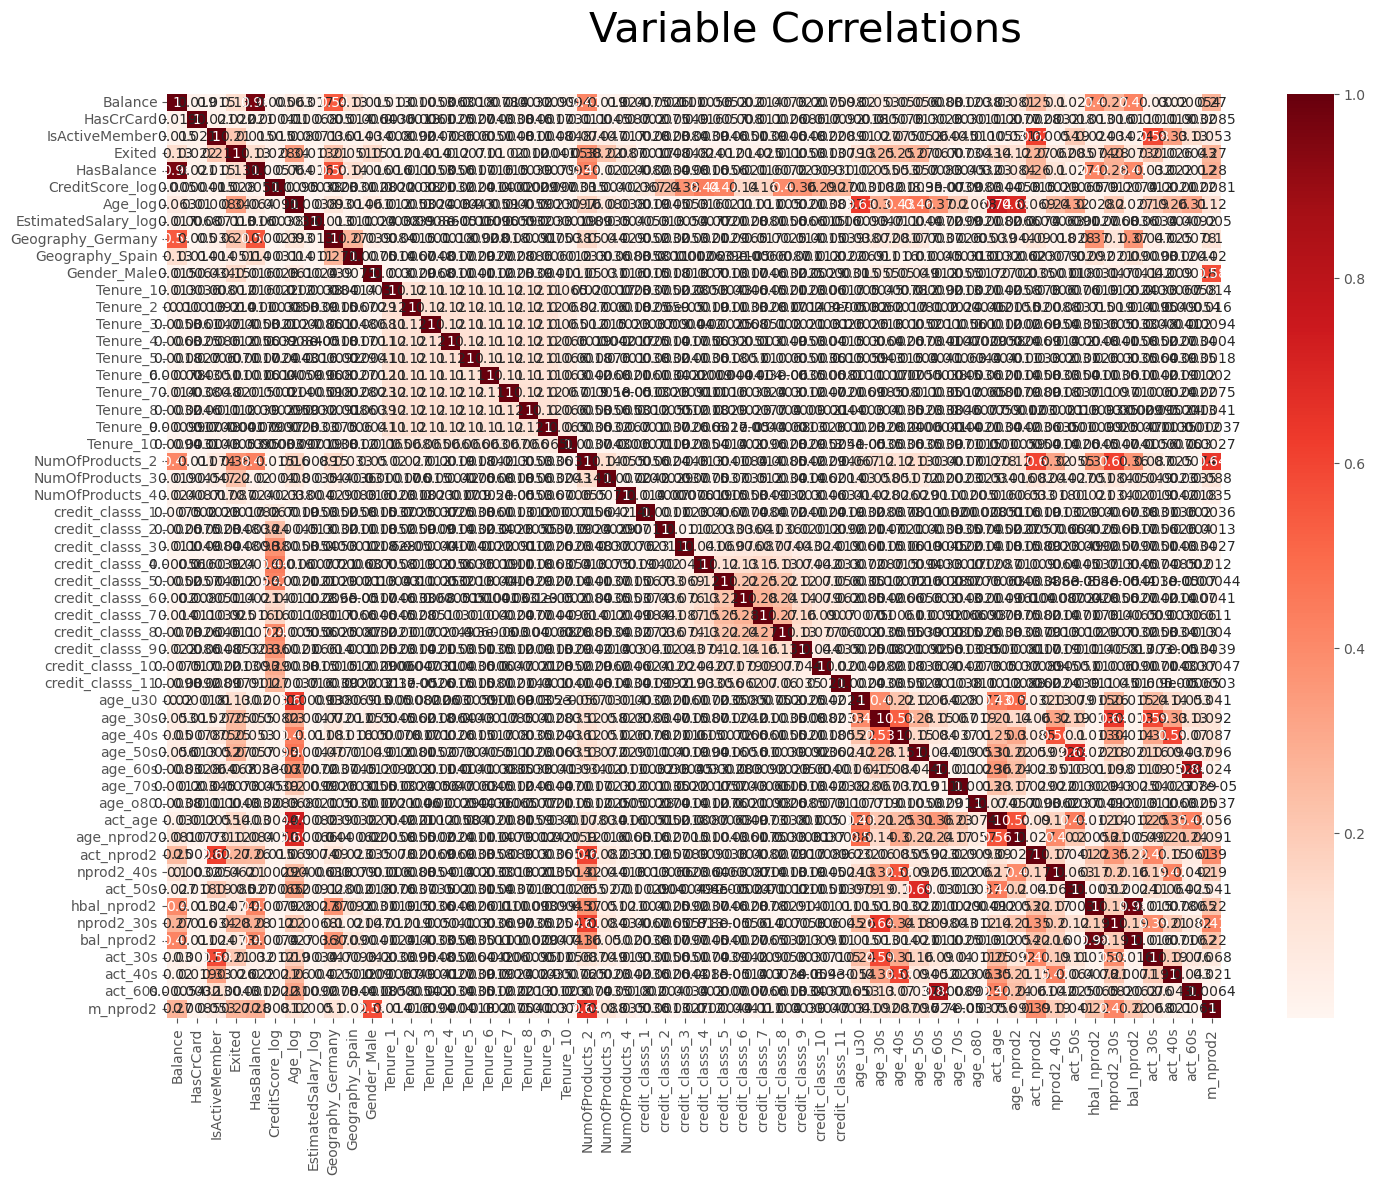

In [153]:
corr = preprocessed6.select_dtypes('number').corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=30, y=.95)
heatmap = sns.heatmap(corr, cmap='Reds', annot=True)

In [154]:
features = []
correlations = []
for idx, correlation in corr['Exited'].T.items():
    if correlation >= .05 and idx != 'Exited':
        features.append(idx)
        correlations.append(correlation)
corr_with_price = pd.DataFrame({'Correlations':correlations, 'Features': features})

Multicollinear_Features = []
Multicollinear_Corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.items():
        if correlation >= .80 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame({'Correlations':Multicollinear_Corr, 'Features': Multicollinear_Features})
print('Multicollinear Features')
display(MC_df)
print('Correlations with Exited')
display(corr_with_price)

Multicollinear Features


Correlations                   Features
0      0.963088      [Balance, HasBalance]
1      0.963088      [HasBalance, Balance]
2      0.835783         [age_60s, act_60s]
3      0.975098  [hbal_nprod2, bal_nprod2]
4      0.975098  [bal_nprod2, hbal_nprod2]
5      0.835783         [act_60s, age_60s]

Correlations with Exited


Correlations           Features
0       0.129743            Balance
1       0.210237     IsActiveMember
2       0.133346         HasBalance
3       0.337053            Age_log
4       0.211054  Geography_Germany
5       0.051175    Geography_Spain
6       0.146442        Gender_Male
7       0.378176    NumOfProducts_2
8       0.219454    NumOfProducts_3
9       0.087367    NumOfProducts_4
10      0.127865            age_u30
11      0.249085            age_30s
12      0.247708            age_40s
13      0.274994            age_50s
14      0.067274            age_60s
15      0.142303            act_age
16      0.118837         age_nprod2
17      0.265678         act_nprod2
18      0.062140         nprod2_40s
19      0.084759            act_50s
20      0.074215        hbal_nprod2
21      0.275112         nprod2_30s
22      0.072632         bal_nprod2
23      0.209614            act_30s
24      0.268433           m_nprod2

In [155]:
# Drop insignificant features
preprocessed7=preprocessed6.drop(columns=['Balance','CreditScore_log','credit_classs_1', 'credit_classs_2', 'credit_classs_3',
                                         'credit_classs_4', 'credit_classs_5', 'credit_classs_6', 'credit_classs_7', 'credit_classs_8',
                                         'credit_classs_9', 'credit_classs_10', 'credit_classs_11', 'bal_nprod2'])

In [156]:
# drop remaining multicolinarity feature
preprocessed7.drop(columns = ['age_60s'], inplace=True)

In [157]:
outcome = 'Exited'
x_cols = preprocessed7.drop("Exited", axis=1)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model7 = ols(formula=formula, data=preprocessed7).fit()
model7.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Exited   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     2708.
Date:                Thu, 22 Feb 2024   Prob (F-statistic):               0.00
Time:                        07:54:15   Log-Likelihood:                -46402.
No. Observations:              165034   AIC:                         9.288e+04
Df Residuals:                  164995   BIC:                         9.327e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.5166      0.007     76.214      0.000       0.503       0.530
HasCrCard              -0.0171      0.002     -9.316      0.000      -0.021      -0.013
IsActiveMember         -0.2176      0.005    -41.604      0.000      -0.228      -0.207
HasBalance             -0.1576      0.003    -60.338      0.000      -0.163      -0.152
Age_log                 0.1235      0.003     48.259      0.000       0.119       0.129
EstimatedSalary_log     0.0029      0.001      3.627      0.000       0.001       0.004
Geography_Germany       0.1611      0.002     65.099      0.000       0.156       0.166
Geography_Spain         0.0016      0.002      0.816      0.414      -0.002       0.006
Gender_Male            -0.1090      0.002    -47.788      0.000      -0.113      -0.105
Tenure_1               -0.0241      0.005     -4.663      0.000      -0.034      -0.014
Tenure_2               -0.0330      0.005     -6.441      0.000      -0.043      -0.023
Tenure_3               -0.0203      0.005     -3.926      0.000      -0.030      -0.010
Tenure_4               -0.0188      0.005     -3.652      0.000      -0.029      -0.009
Tenure_5               -0.0236      0.005     -4.580      0.000      -0.034      -0.013
Tenure_6               -0.0337      0.005     -6.479      0.000      -0.044      -0.023
Tenure_7               -0.0365      0.005     -7.123      0.000      -0.047      -0.026
Tenure_8               -0.0350      0.005     -6.807      0.000      -0.045      -0.025
Tenure_9               -0.0299      0.005     -5.781      0.000      -0.040      -0.020
Tenure_10              -0.0304      0.006     -4.939      0.000      -0.042      -0.018
NumOfProducts_2        -0.4071      0.004    -92.602      0.000      -0.416      -0.398
NumOfProducts_3         0.3696      0.006     60.417      0.000       0.358       0.382
NumOfProducts_4         0.3538      0.015     23.941      0.000       0.325       0.383
age_u30                 0.0661      0.006     10.994      0.000       0.054       0.078
age_30s                -0.0361      0.005     -7.295      0.000      -0.046      -0.026
age_40s                 0.2002      0.006     31.685      0.000       0.188       0.213
age_50s                 0.2668      0.007     39.127      0.000       0.253       0.280
age_70s                -0.0286      0.015     -1.906      0.057      -0.058       0.001
age_o80                -0.0987      0.043     -2.291      0.022      -0.183      -0.014
act_age                -0.0667      0.003    -21.811      0.000      -0.073      -0.061
age_nprod2             -0.0578      0.002    -31.190      0.000      -0.061      -0.054
act_nprod2              0.1062      0.003     32.630      0.000       0.100       0.113
nprod2_40s             -0.1027      0.006    -16.036      0.000      -0.115      -0.090
act

In [158]:
# Clean up insignificant features
preprocessed7.drop(columns = ['Geography_Spain', 'age_u30', 'act_40s', 'act_60s'], inplace=True)

In [159]:
outcome = 'Exited'
x_cols = preprocessed7.drop("Exited", axis=1)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model7 = ols(formula=formula, data=preprocessed7).fit()
model7.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Exited   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     3017.
Date:                Thu, 22 Feb 2024   Prob (F-statistic):               0.00
Time:                        07:54:16   Log-Likelihood:                -46509.
No. Observations:              165034   AIC:                         9.309e+04
Df Residuals:                  164999   BIC:                         9.344e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.5524      0.006     93.688      0.000       0.541       0.564
HasCrCard              -0.0171      0.002     -9.301      0.000      -0.021      -0.013
IsActiveMember         -0.1941      0.003    -66.570      0.000      -0.200      -0.188
HasBalance             -0.1574      0.003    -60.235      0.000      -0.163      -0.152
Age_log                 0.1100      0.002     59.106      0.000       0.106       0.114
EstimatedSalary_log     0.0028      0.001      3.522      0.000       0.001       0.004
Geography_Germany       0.1606      0.002     66.718      0.000       0.156       0.165
Gender_Male            -0.1092      0.002    -47.861      0.000      -0.114      -0.105
Tenure_1               -0.0244      0.005     -4.719      0.000      -0.035      -0.014
Tenure_2               -0.0333      0.005     -6.500      0.000      -0.043      -0.023
Tenure_3               -0.0206      0.005     -3.982      0.000      -0.031      -0.010
Tenure_4               -0.0192      0.005     -3.729      0.000      -0.029      -0.009
Tenure_5               -0.0240      0.005     -4.664      0.000      -0.034      -0.014
Tenure_6               -0.0343      0.005     -6.584      0.000      -0.044      -0.024
Tenure_7               -0.0369      0.005     -7.193      0.000      -0.047      -0.027
Tenure_8               -0.0355      0.005     -6.902      0.000      -0.046      -0.025
Tenure_9               -0.0303      0.005     -5.868      0.000      -0.040      -0.020
Tenure_10              -0.0311      0.006     -5.051      0.000      -0.043      -0.019
NumOfProducts_2        -0.4041      0.004    -92.078      0.000      -0.413      -0.395
NumOfProducts_3         0.3702      0.006     60.472      0.000       0.358       0.382
NumOfProducts_4         0.3535      0.015     23.905      0.000       0.325       0.382
age_30s                -0.0752      0.003    -21.671      0.000      -0.082      -0.068
age_40s                 0.1713      0.005     36.837      0.000       0.162       0.180
age_50s                 0.2533      0.006     42.545      0.000       0.242       0.265
age_70s                -0.0818      0.013     -6.474      0.000      -0.107      -0.057
age_o80                -0.1488      0.042     -3.531      0.000      -0.231      -0.066
act_age                -0.0509      0.002    -26.935      0.000      -0.055      -0.047
age_nprod2             -0.0586      0.002    -31.720      0.000      -0.062      -0.055
act_nprod2              0.1057      0.003     32.472      0.000       0.099       0.112
nprod2_40s             -0.1117      0.006    -17.690      0.000      -0.124      -0.099
act_50s                -0.0851      0.007    -12.117      0.000      -0.099      -0.071
hbal_nprod2             0.1410      0.004     39.680      0.000       0.134       0.148
npr

In [ ]:
# The results of the final model show that; #
# the Prob(Omnibus) is close to zero indicateting that the residuals are following a normal distribution.
# the skew indicates a slightly posative skew.
# the kurtosis value indicates a moderately peaked distribution.
# the Druban-Watson is a little higher than the ideal 1-2 but at 2.006 this would suggest that there is no significant autocorrelation.
# the JB test checks normality and the high value, combined with a very low p=-value, suggest that the residuals deviate significantly from normality.
# the condition number is relatively low indicating no multicollinearity.

# This model has increased the r^2 to 0.383, wich is a significant change from the previous models. 
# There are no features that do not show a p value greater than 0.0004, meaning all features are significant.


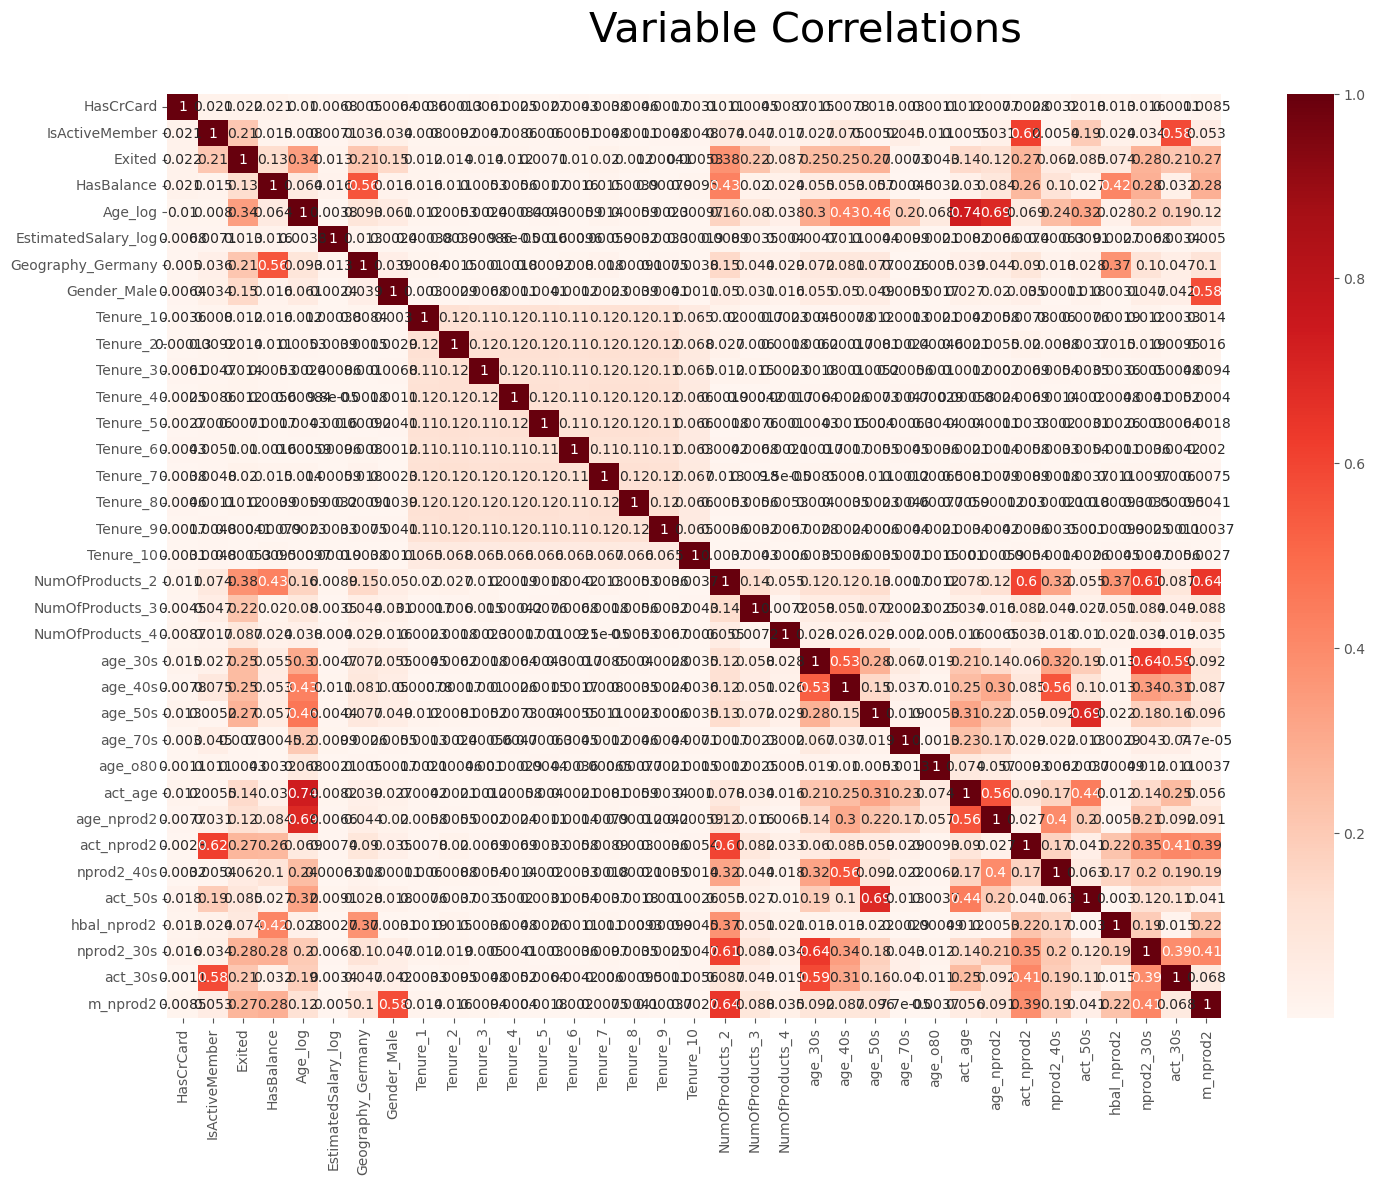

In [160]:
corr = preprocessed7.select_dtypes('number').corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=30, y=.95)
heatmap = sns.heatmap(corr, cmap='Reds', annot=True)

In [161]:
features = []
correlations = []
for idx, correlation in corr['Exited'].T.items():
    if correlation >= .05 and idx != 'Exited':
        features.append(idx)
        correlations.append(correlation)
corr_with_price = pd.DataFrame({'Correlations':correlations, 'Features': features})

Multicollinear_Features = []
Multicollinear_Corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.items():
        if correlation >= .80 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame({'Correlations':Multicollinear_Corr, 'Features': Multicollinear_Features})
print('Multicollinear Features')
display(MC_df)
print('Correlations with Exited')
display(corr_with_price)

Multicollinear Features


Empty DataFrame
Columns: [Correlations, Features]
Index: []

Correlations with Exited


Correlations           Features
0       0.210237     IsActiveMember
1       0.133346         HasBalance
2       0.337053            Age_log
3       0.211054  Geography_Germany
4       0.146442        Gender_Male
5       0.378176    NumOfProducts_2
6       0.219454    NumOfProducts_3
7       0.087367    NumOfProducts_4
8       0.249085            age_30s
9       0.247708            age_40s
10      0.274994            age_50s
11      0.142303            act_age
12      0.118837         age_nprod2
13      0.265678         act_nprod2
14      0.062140         nprod2_40s
15      0.084759            act_50s
16      0.074215        hbal_nprod2
17      0.275112         nprod2_30s
18      0.209614            act_30s
19      0.268433           m_nprod2

<Figure size 1200x800 with 0 Axes>

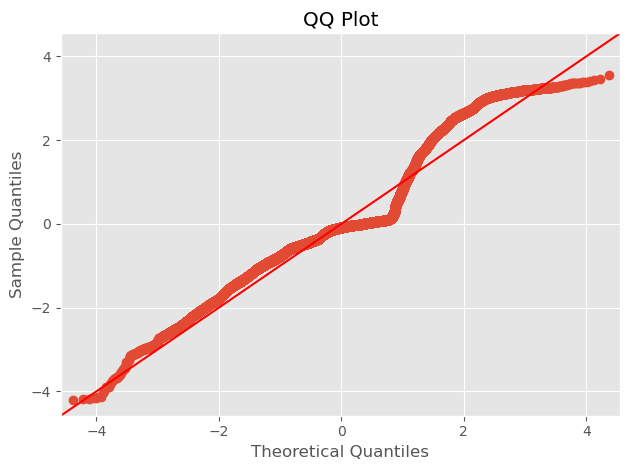

In [162]:
plt.figure(figsize=(12, 8))
fig = sm.graphics.qqplot(model7.resid, dist=stats.norm, line='45', fit=True)
plt.title('QQ Plot')
plt.tight_layout()
plt.show()

In [163]:
##plt.figure(figsize=(10,5))
##sns.regplot(x=model7.predict(), y=model7.resid, lowess=True, line_kws={'color': 'blue'})
##plt.title('Residuals Scatterplot', fontsize=16, y=.99)

In [164]:
#create test and training data subsets
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [165]:
X_train, X_test, y_train, y_test = train_test_split(preprocessed7, preprocessed7.Exited)
train, test = train_test_split(preprocessed7,test_size=.25,shuffle=True)

In [166]:
df_train = pd.DataFrame(X_train, y_train)
df_test = pd.DataFrame(X_test, y_test)

In [167]:
#fit the data 
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [168]:
y_pred_train = model7.predict(X_train)
y_pred_test = model7.predict(X_test)

In [169]:
train_mse = np.mean(y_train-y_pred_train)**2
test_mse = np.mean(y_test-y_pred_test)**2

train_r2 = r2_score(train['Exited'], model7.predict(train))
test_r2 = r2_score(test['Exited'], model7.predict(test))

print('Mean Squared Error Train:', train_mse)
print('Mean Squared Error Test:', test_mse)
print(f'R-Squared Train = {round(train_r2,3)}')
print(f'R-Squared Test = {round(test_r2,3)}')

Mean Squared Error Train: 3.045313199403474e-08
Mean Squared Error Test: 2.7406933102496616e-07
R-Squared Train = 0.382
R-Squared Test = 0.389


In [ ]:
# the model is performing well with minimal difference between the train and test data.